## Assignment 4

Name: NUPOOR KORDE

NUID: 002792237

# Abstract

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors. This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.


# Description



**Age** - This determines the age of the patient

**Gender** - This determines the gender of the patient

**Total Bilirubin** - Total bilirubin is a combination of direct and indirect bilirubin 

**Direct Bilirubin** - Bilirubin is changed into a form that your body can get rid of. This will give you the value of Bilirubin in a patient's body

**Alkaline Phosphotase** - This will determine the alkaline phosphotase level in a patient's body

**Alamine Aminotransferase** - Alanine transaminase is a transaminase enzyme. 

**Aspartate Aminotransferase** - AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but it's also in muscles and other organs in your body

**Total Protiens** - Total proteins in a patient's body.

**Albumin** - Albumin is a protein made by your liver.

**Albumin and Globulin Ratio** - 
A total protein and albumin/globulin (A/G) ratio test measures the total amount of protein in your blood.

**Dataset** - This field used to split the data into two sets (patient with liver disease, or no disease)


## **Feature Selection and Data Cleaning**

In [1]:
#installing dependencies
!pip install eli5
!pip install fitter
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=fd4898199cdb09d0ed487f670d8a61547fecdf5bdfc2cf295a173c6a01cc8c5d
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=cbccda6be4c8c8e3ac1425f396197ac3675f78c8c0f7c1db52e91df9f8e8a351
  Stored in directory: /root/.cache/pip/wheels/2f/4b/12/1c9085f8ecb92805ca8645ab9c61703a2874685a9fb87b0bdb
Successfully built fitter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/co

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from fitter import Fitter, get_common_distributions, get_distributions
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/Nupoor1998/DataScience_Assignment1/main/indian_liver_patient.csv")

In [4]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [5]:
num_cols = data._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
        'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
       dtype='object'),
 10)

In [6]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['Gender'], 1)

In [7]:
# converting 
for cat_col in cat_cols:
  classes = list(np.unique(data[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  data[cat_col].replace(classes, tokens, inplace=True)

In [8]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [9]:
#checking if the any data is missing
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.56it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
norm             0.013009   981.956970 -6231.355588     inf      0.055289   
gamma            0.013009   983.429083 -6224.985722     inf      0.055444   
lognorm          0.013016   983.564669 -6224.670177     inf      0.055325   
rayleigh         0.014282   940.244739 -6176.952898     inf      0.126523   
cauchy           0.014854  1008.256622 -6154.065014     inf      0.100942   

             ks_pvalue  
norm      5.452234e-02  
gamma     5.343692e-02  
lognorm   5.427044e-02  
rayleigh  1.354939e-08  
cauchy    1.265283e-05  


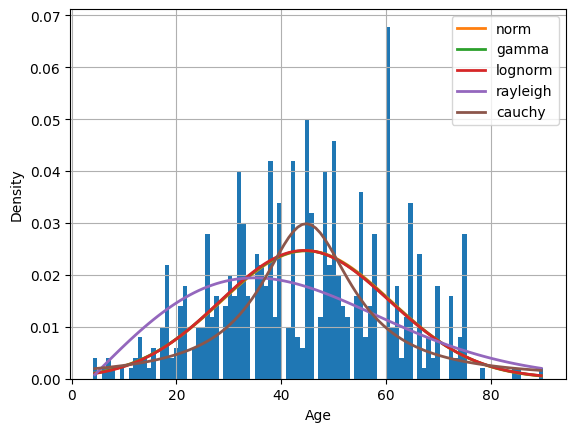

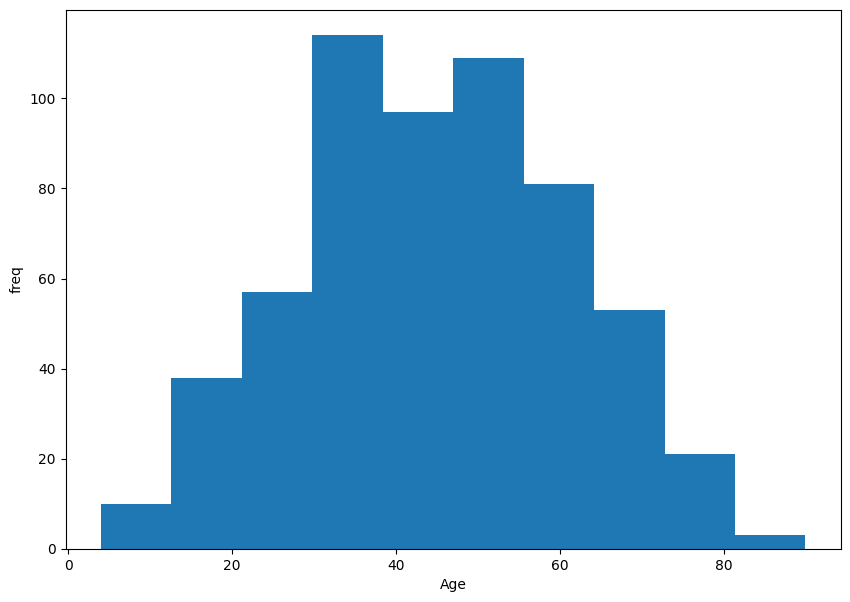

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.08it/s]


         sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm         0.030674  1592.309499 -5724.921974     inf      0.164416   
cauchy          0.036985  1773.843609 -5622.204647     inf      0.270669   
chi2            0.170601  2046.554481 -4724.541379     inf      0.242368   
expon           0.225749  2790.338614 -4567.614694     inf      0.341211   
gamma           0.230392  1977.041054 -4549.375789     inf      0.587399   

             ks_pvalue  
lognorm   3.061871e-14  
cauchy    3.220203e-38  
chi2      1.241668e-30  
expon     4.344562e-61  
gamma    5.977878e-192  


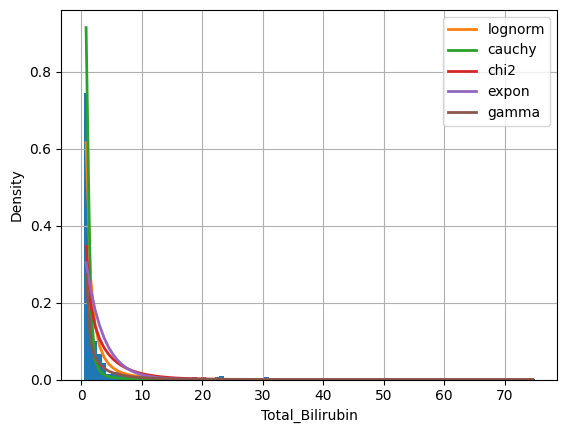

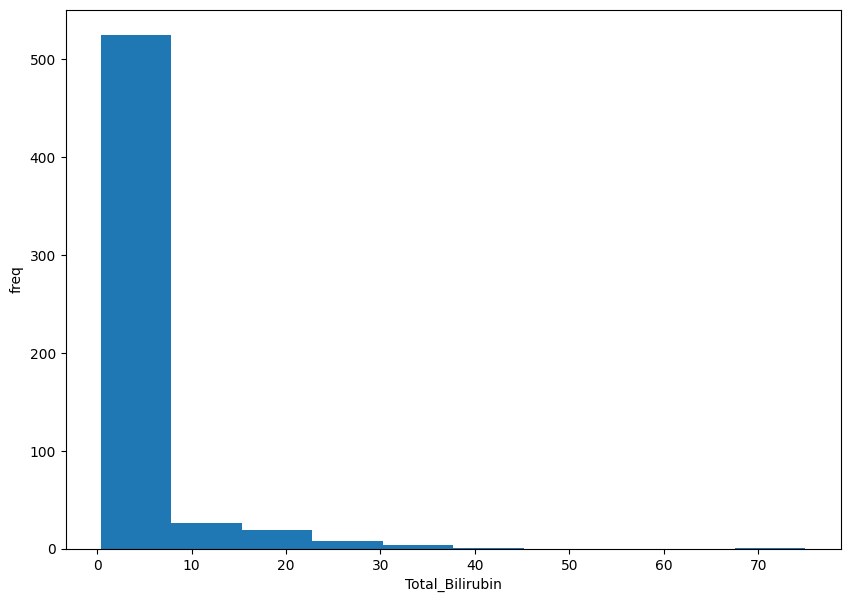

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 17.07it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.374478  1377.262749 -4272.552423     inf      0.326734   
exponpow         1.412264   996.861673 -3492.300516     inf      0.225739   
chi2             1.876501   877.316451 -3326.603079     inf      0.181050   
gamma            1.885273   882.767387 -3323.884074     inf      0.213073   
lognorm          2.348587  1088.503968 -3195.775124     inf      0.567064   

              ks_pvalue  
cauchy     6.370382e-56  
exponpow   1.379663e-26  
chi2       3.408205e-17  
gamma      1.046466e-23  
lognorm   1.312431e-177  


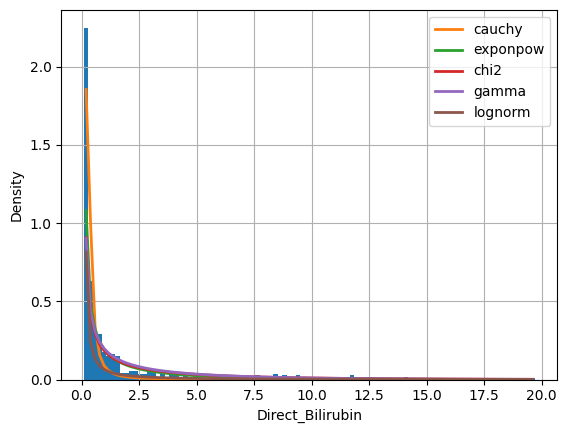

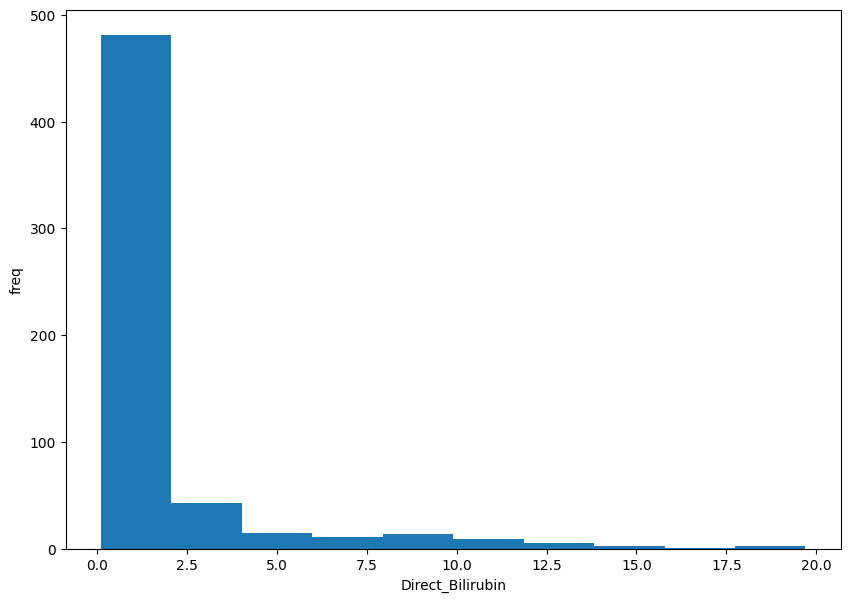

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


          sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy           0.000021  2053.301787 -9966.780838     inf      0.154231   
lognorm          0.000041  2101.571824 -9585.457167     inf      0.117751   
rayleigh         0.000096  2873.482069 -9091.590493     inf      0.276288   
expon            0.000101  1988.975572 -9061.322013     inf      0.232164   
norm             0.000112  2954.003351 -9002.762749     inf      0.254174   

             ks_pvalue  
cauchy    1.414773e-12  
lognorm   1.684558e-07  
rayleigh  7.860105e-40  
expon     4.095386e-28  
norm      1.089886e-33  


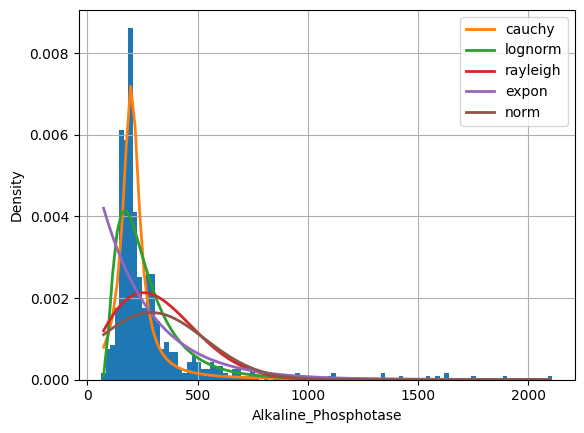

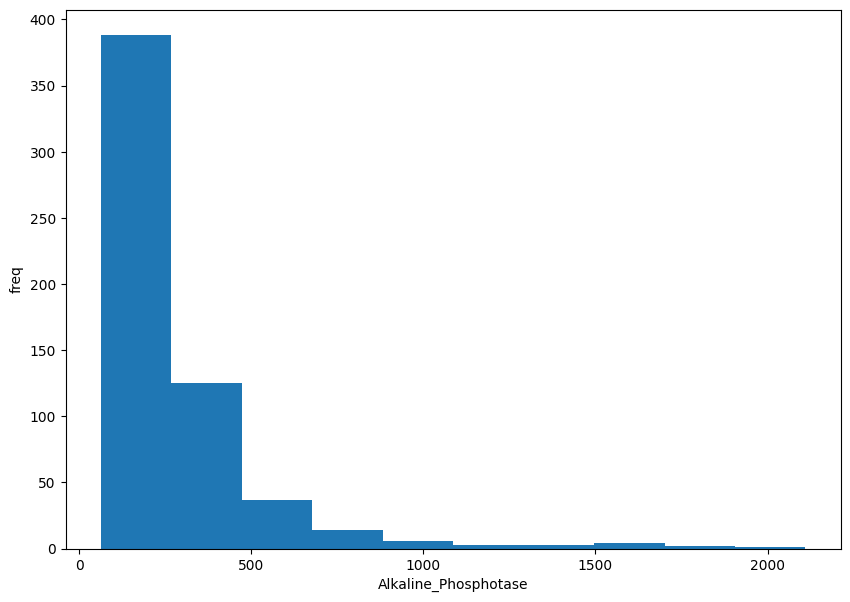

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 11.69it/s]


          sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm          0.000012  2359.093376 -10292.488961     inf      0.067764   
cauchy           0.000044  2338.540315  -9545.569067     inf      0.188400   
chi2             0.000094  2756.507677  -9097.410802     inf      0.218006   
expon            0.000100  3669.898113  -9066.746136     inf      0.248944   
exponpow         0.000243  1753.729200  -8546.514882     inf      0.361385   

             ks_pvalue  
lognorm   9.007382e-03  
cauchy    1.362536e-18  
chi2      8.291845e-25  
expon     2.572473e-32  
exponpow  1.044094e-68  


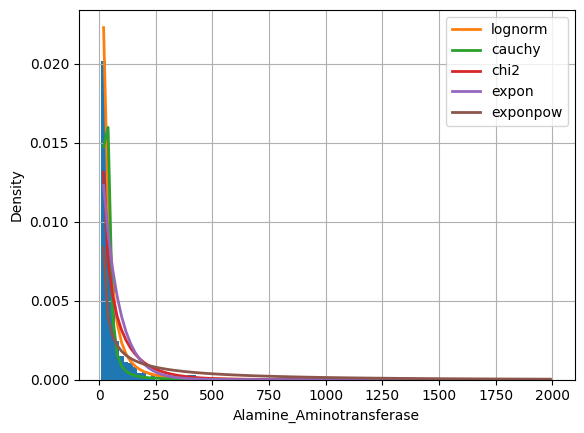

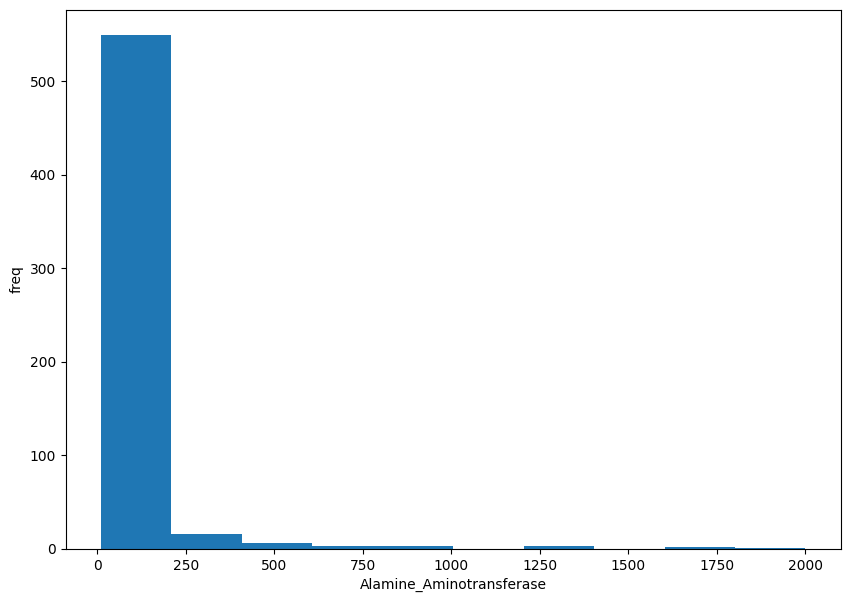

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.000002  2742.494599 -11407.956266     inf      0.058452   
cauchy          0.000019  2641.881901 -10042.848480     inf      0.210994   
expon           0.000036  5848.246931  -9661.584753     inf      0.262444   
gamma           0.000043  3621.025259  -9561.788048     inf      0.169435   
chi2            0.000067  2526.627236  -9300.448016     inf      0.243637   

            ks_pvalue  
lognorm  3.575135e-02  
cauchy   2.991059e-23  
expon    6.373287e-36  
gamma    4.221407e-15  
chi2     5.927826e-31  


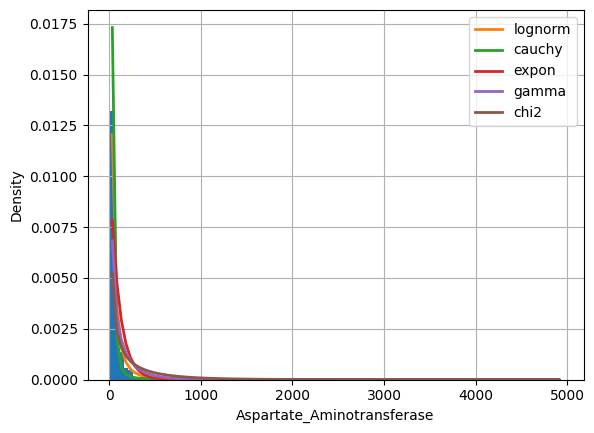

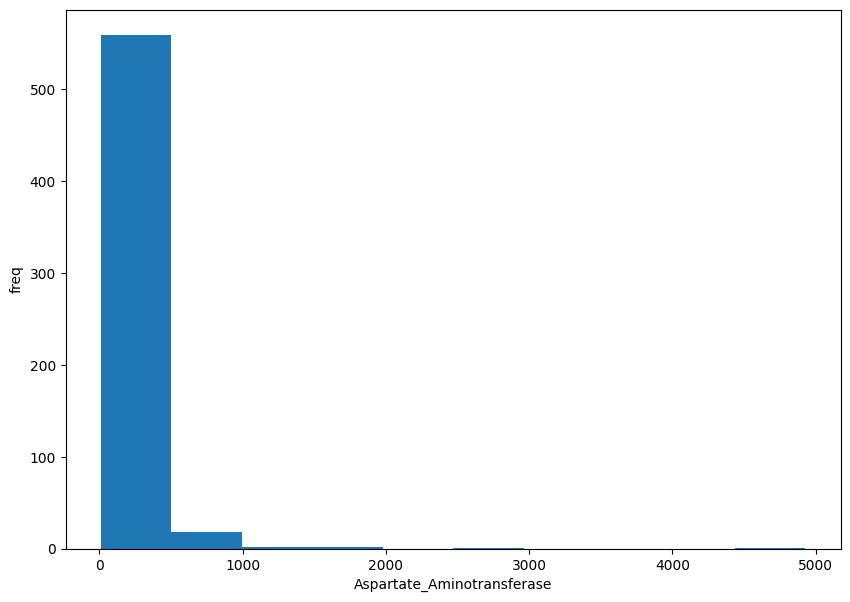

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.76it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
norm             2.319694  550.739824 -3209.359956     inf      0.064302   
lognorm          2.322136  554.739490 -3202.378295     inf      0.066889   
gamma            2.332141  558.810040 -3199.871781     inf      0.069193   
chi2             2.343330  555.677618 -3197.081422     inf      0.073969   
exponpow         2.393573  544.762218 -3184.713670     inf      0.068952   

          ks_pvalue  
norm       0.015398  
lognorm    0.010343  
gamma      0.007159  
chi2       0.003211  
exponpow   0.007445  


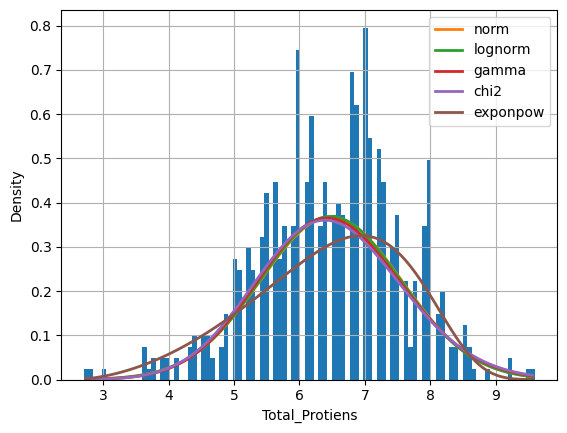

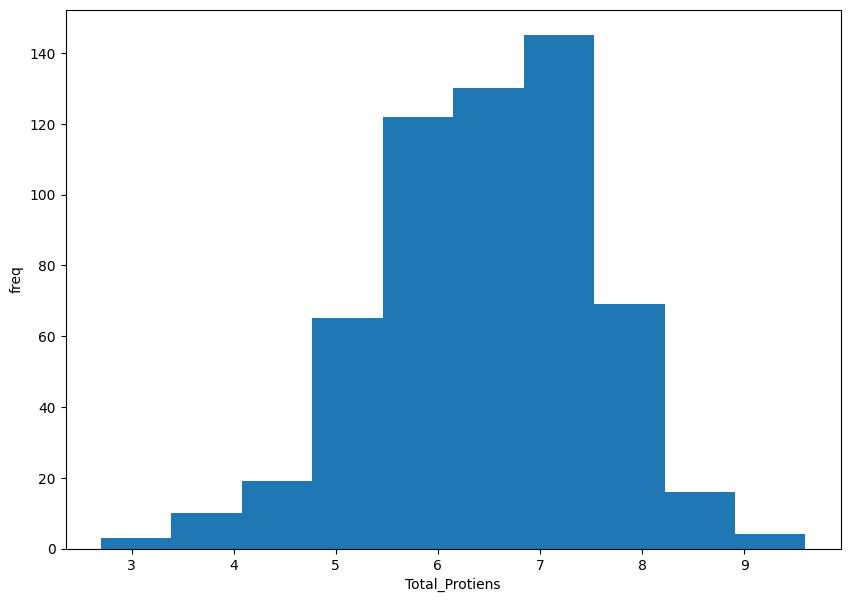

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 14.01it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow        10.500898  438.183074 -2322.646958     inf      0.061170   
norm            10.509737  421.483523 -2328.524582     inf      0.059764   
gamma           10.511486  422.863859 -2322.059417     inf      0.059887   
lognorm         10.513048  423.914793 -2321.972784     inf      0.060289   
chi2            10.528652  421.597191 -2321.108078     inf      0.061140   

          ks_pvalue  
exponpow   0.024417  
norm       0.029806  
gamma      0.029295  
lognorm    0.027680  
chi2       0.024520  


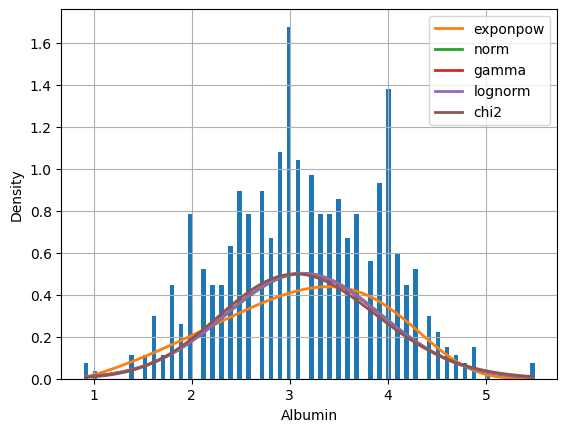

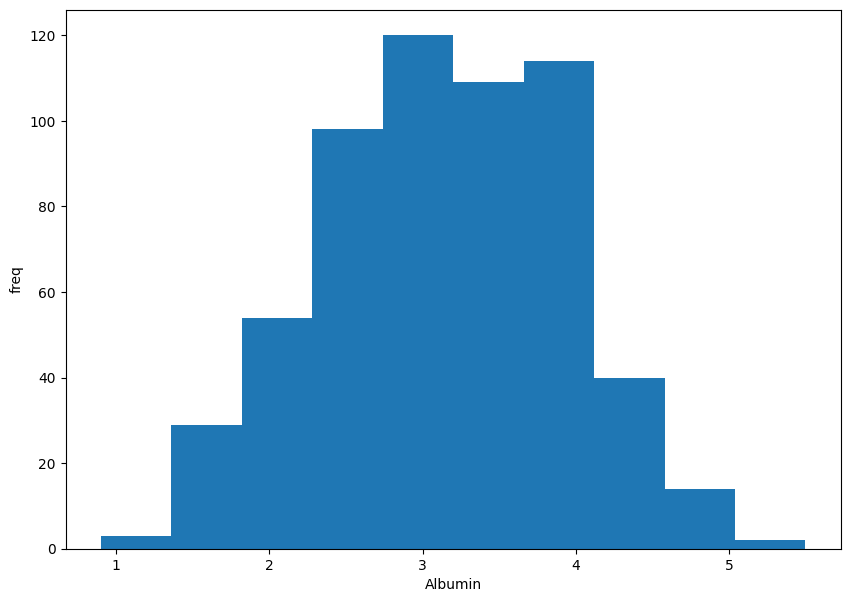

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 57.42it/s]


         sumsquare_error  aic  bic  kl_div  ks_statistic  ks_pvalue
cauchy               inf  inf  inf     inf           NaN        NaN
chi2                 inf  inf  inf     inf           NaN        NaN
expon                inf  inf  inf     inf           NaN        NaN
gamma                inf  inf  inf     inf           NaN        NaN
lognorm              inf  inf  inf     inf           NaN        NaN


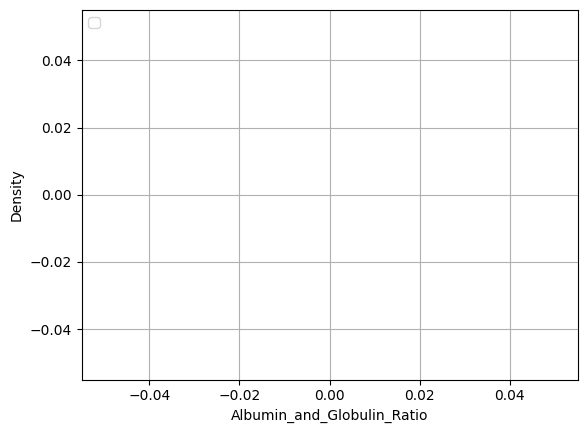

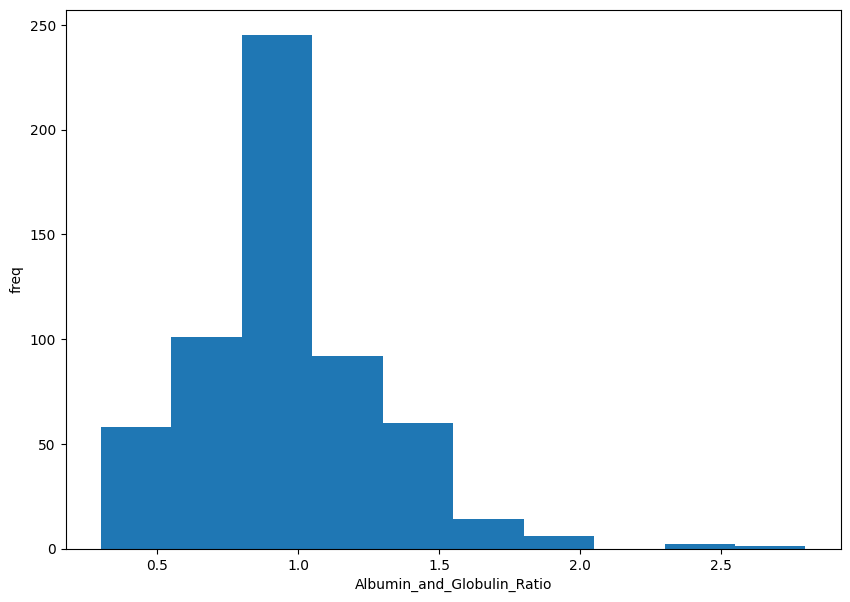

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 12.48it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
gamma         3645.162940  495.585376  1087.725582     inf      0.712543   
exponpow      4248.446922  253.971910  1177.013442     inf      0.713100   
chi2          4659.246032  139.705383  1230.824431     inf      0.713551   
powerlaw      5069.450776  467.550954  1280.017297     inf      0.467309   
expon         5590.646471  103.063122  1330.702916     inf      0.713551   

              ks_pvalue  
gamma     2.238614e-299  
exponpow  6.068075e-300  
chi2      2.110550e-300  
powerlaw  3.257822e-117  
expon     2.110374e-300  


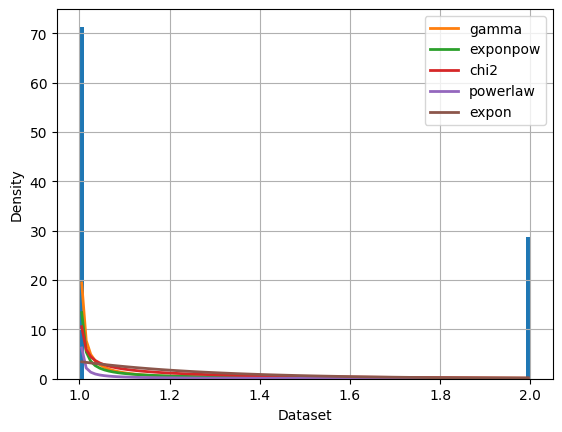

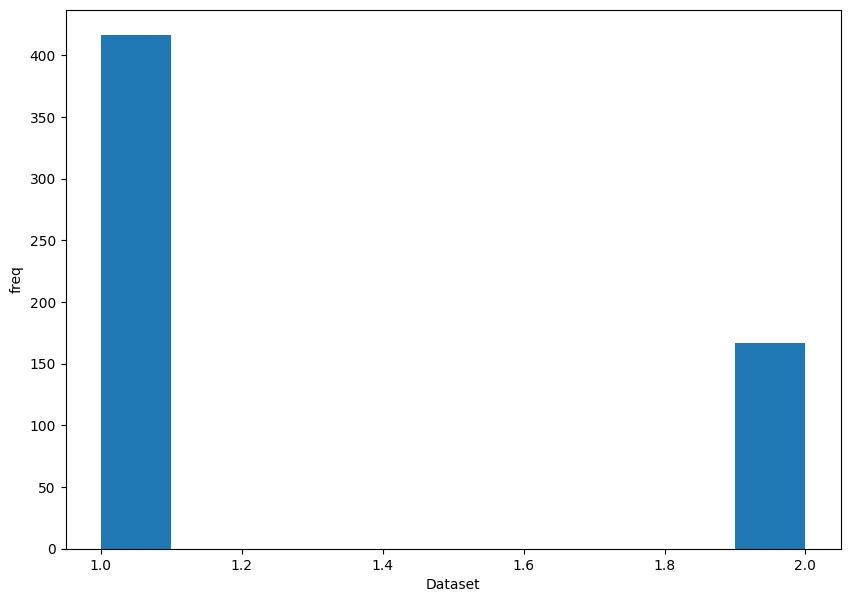

In [10]:
cols = data.drop(columns = ['Gender'])


for col in cols:

  col_vs = data[col].values
  f = Fitter(col_vs, distributions=get_common_distributions())
  f.fit()
  print(f.summary())
  plt.ylabel("Density")
  plt.xlabel(f"{col}")
  
  col_list = data[col].to_list()
  fig, ax = plt.subplots(figsize =(10, 7))
  ax.hist(col_list) #, bins = [0, 25, 50, 75, 100])
  
  plt.xlabel(f"{col}")
  plt.ylabel("freq")
  plt.show()

### *Min and Max Scaling*

In [11]:
from sklearn import preprocessing

print(data.columns)

x = data.drop(columns = cat_cols)
x = x.drop(columns=['Dataset'])

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(x_scaled)

num_cols_ = num_cols[:-1]
print(x_scaled.shape, len(num_cols), num_cols)

data_norm = pd.DataFrame(data=x_scaled, columns=num_cols_)
data_norm['Dataset'] = data['Dataset']

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')
[[0.70930233 0.00402145 0.         ... 0.5942029  0.52173913 0.24      ]
 [0.6744186  0.14075067 0.2755102  ... 0.69565217 0.5        0.176     ]
 [0.6744186  0.0924933  0.20408163 ... 0.62318841 0.52173913 0.236     ]
 ...
 [0.55813953 0.00536193 0.00510204 ... 0.53623188 0.5        0.28      ]
 [0.31395349 0.01206434 0.02040816 ... 0.5942029  0.54347826 0.28      ]
 [0.39534884 0.0080429  0.01020408 ... 0.66666667 0.76086957 0.48      ]]
(583, 9) 10 Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [12]:
data_norm.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302         0.004021          0.000000              0.060576   
1  0.674419         0.140751          0.275510              0.310699   
2  0.674419         0.092493          0.204082              0.208598   
3  0.627907         0.008043          0.015306              0.058134   
4  0.790698         0.046917          0.096939              0.064485   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.003015                    0.001626        0.594203   
1                  0.027136                    0.018296        0.695652   
2                  0.025126                    0.011791        0.623188   
3                  0.002010                    0.002033        0.594203   
4                  0.008543                    0.009961        0.666667   

    Albumin  Albumin_and_Globulin_Ratio  Dataset  
0  0.521739                       0.240        1  
1  0.500000                       0.176        1  
2  0.521739                       0.236        1  
3  0.543478                       0.280        1  
4  0.326087                       0.040        1

In [13]:
data_norm.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean     0.473792         0.038858          0.070720              0.111176   
std      0.188254         0.083238          0.143291              0.118680   
min      0.000000         0.000000          0.000000              0.000000   
25%      0.337209         0.005362          0.005102              0.054958   
50%      0.476744         0.008043          0.010204              0.070835   
75%      0.627907         0.029491          0.061224              0.114802   
max      1.000000         1.000000          1.000000              1.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                   0.035534                    0.020311        0.548288   
std                    0.091769                    0.058735        0.157312   
min                    0.000000                    0.000000        0.000000   
25%                    0.006533                    0.003049        0.449275   
50%                    0.012563                    0.006505        0.565217   
75%                    0.025377                    0.015654        0.652174   
max                    1.000000                    1.000000        1.000000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     0.487359                    0.258826    1.286449  
std      0.172939                    0.127837    0.452490  
min      0.000000                    0.000000    1.000000  
25%      0.369565                    0.160000    1.000000  
50%      0.478261                    0.252000    1.000000  
75%      0.630435                    0.320000    2.000000  
max      1.000000                    1.000000    2.000000

In [14]:
data_norm.corr()

Age  Total_Bilirubin  Direct_Bilirubin  \
Age                         1.000000         0.011763          0.007529   
Total_Bilirubin             0.011763         1.000000          0.874618   
Direct_Bilirubin            0.007529         0.874618          1.000000   
Alkaline_Phosphotase        0.080425         0.206669          0.234939   
Alamine_Aminotransferase   -0.086883         0.214065          0.233894   
Aspartate_Aminotransferase -0.019910         0.237831          0.257544   
Total_Protiens             -0.187461        -0.008099         -0.000139   
Albumin                    -0.265924        -0.222250         -0.228531   
Albumin_and_Globulin_Ratio -0.216408        -0.206267         -0.200125   
Dataset                    -0.137351        -0.220208         -0.246046   

                            Alkaline_Phosphotase  Alamine_Aminotransferase  \
Age                                     0.080425                 -0.086883   
Total_Bilirubin                         0.206669                  0.214065   
Direct_Bilirubin                        0.234939                  0.233894   
Alkaline_Phosphotase                    1.000000                  0.125680   
Alamine_Aminotransferase                0.125680                  1.000000   
Aspartate_Aminotransferase              0.167196                  0.791966   
Total_Protiens                         -0.028514                 -0.042518   
Albumin                                -0.165453                 -0.029742   
Albumin_and_Globulin_Ratio             -0.234166                 -0.002375   
Dataset                                -0.184866                 -0.163416   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.070040        0.234887   
Dataset                                      -0.151934        0.035008   

                             Albumin  Albumin_and_Globulin_Ratio   Dataset  
Age                        -0.265924                   -0.216408 -0.137351  
Total_Bilirubin            -0.222250                   -0.206267 -0.220208  
Direct_Bilirubin           -0.228531                   -0.200125 -0.246046  
Alkaline_Phosphotase       -0.165453                   -0.234166 -0.184866  
Alamine_Aminotransferase   -0.029742                   -0.002375 -0.163416  
Aspartate_Aminotransferase -0.085290                   -0.070040 -0.151934  
Total_Protiens              0.784053                    0.234887  0.035008  
Albumin                     1.000000                    0.689632  0.161388  
Albumin_and_Globulin_Ratio  0.689632                    1.000000  0.163131  
Dataset                     0.161388                    0.163131  1.000000

In [15]:
f_data = pd.concat([data_norm, data[cat_cols]], axis=1)

In [16]:
f_data.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302         0.004021          0.000000              0.060576   
1  0.674419         0.140751          0.275510              0.310699   
2  0.674419         0.092493          0.204082              0.208598   
3  0.627907         0.008043          0.015306              0.058134   
4  0.790698         0.046917          0.096939              0.064485   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.003015                    0.001626        0.594203   
1                  0.027136                    0.018296        0.695652   
2                  0.025126                    0.011791        0.623188   
3                  0.002010                    0.002033        0.594203   
4                  0.008543                    0.009961        0.666667   

    Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender  
0  0.521739                       0.240        1       0  
1  0.500000                       0.176        1       1  
2  0.521739                       0.236        1       1  
3  0.543478                       0.280        1       1  
4  0.326087                       0.040        1       1

In [17]:
f_data.corr()['Dataset']

Age                          -0.137351
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alamine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.163131
Dataset                       1.000000
Gender                       -0.082416
Name: Dataset, dtype: float64

In [18]:
#['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Albumin','Albumin_and_Globulin_Ratio']


<Axes: >

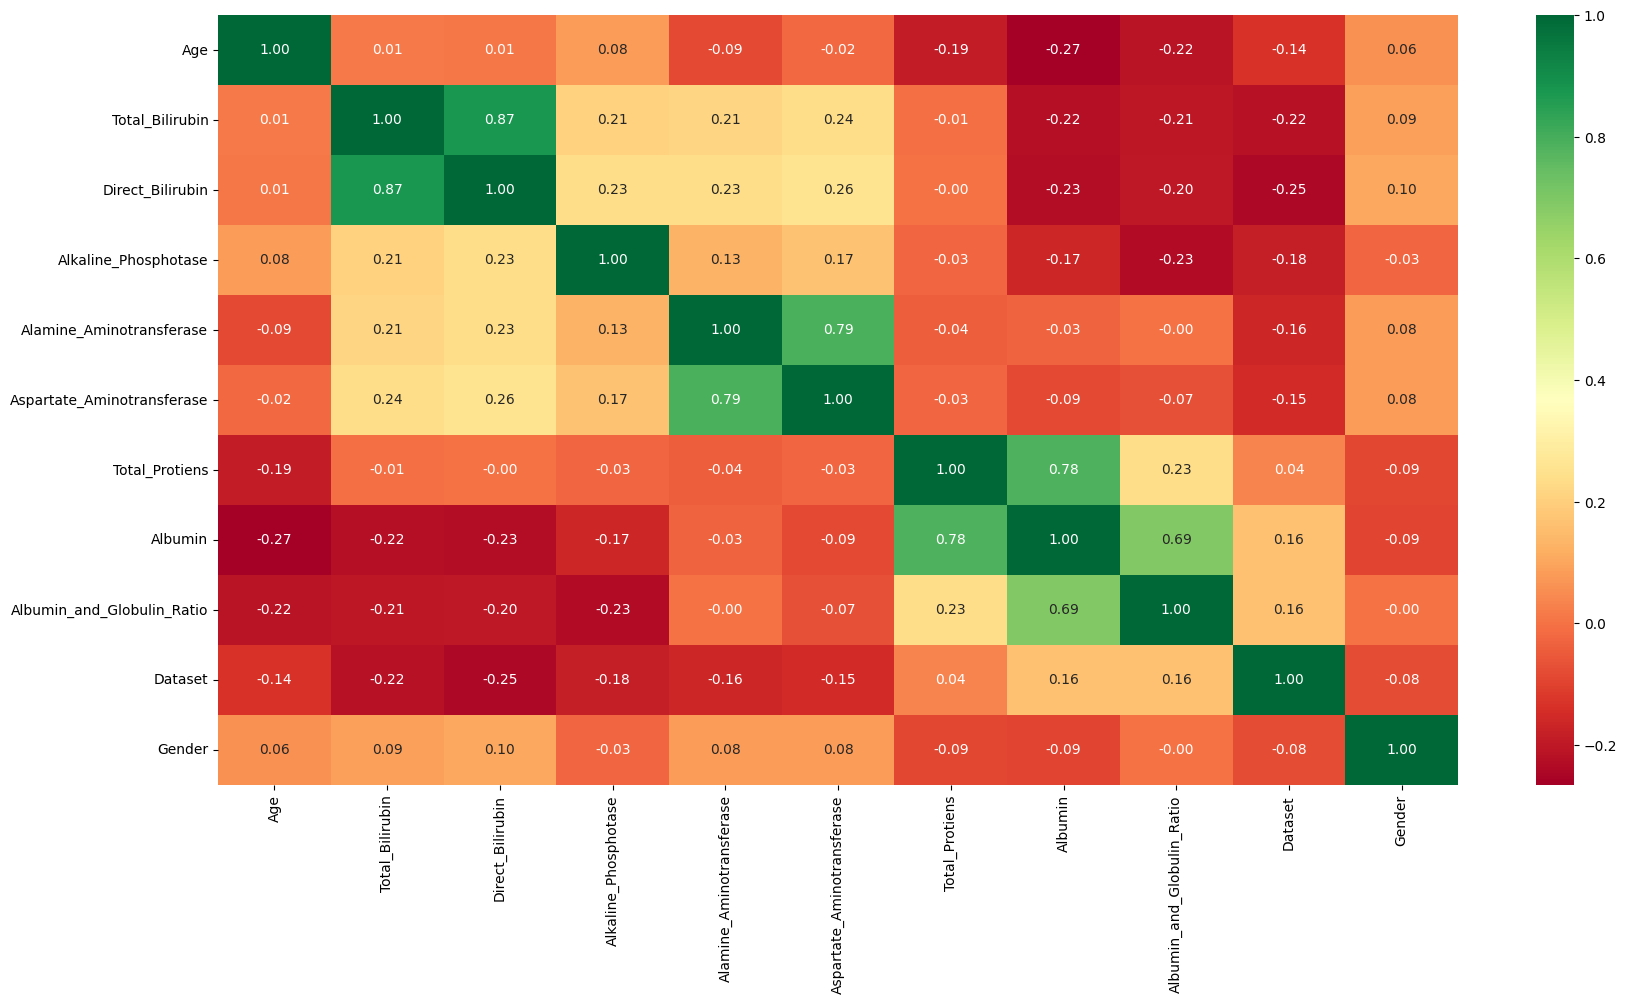

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(f_data.corr(), annot =True, cmap = "RdYlGn", fmt= '.2f')

### *BoxPlot*

<Axes: >

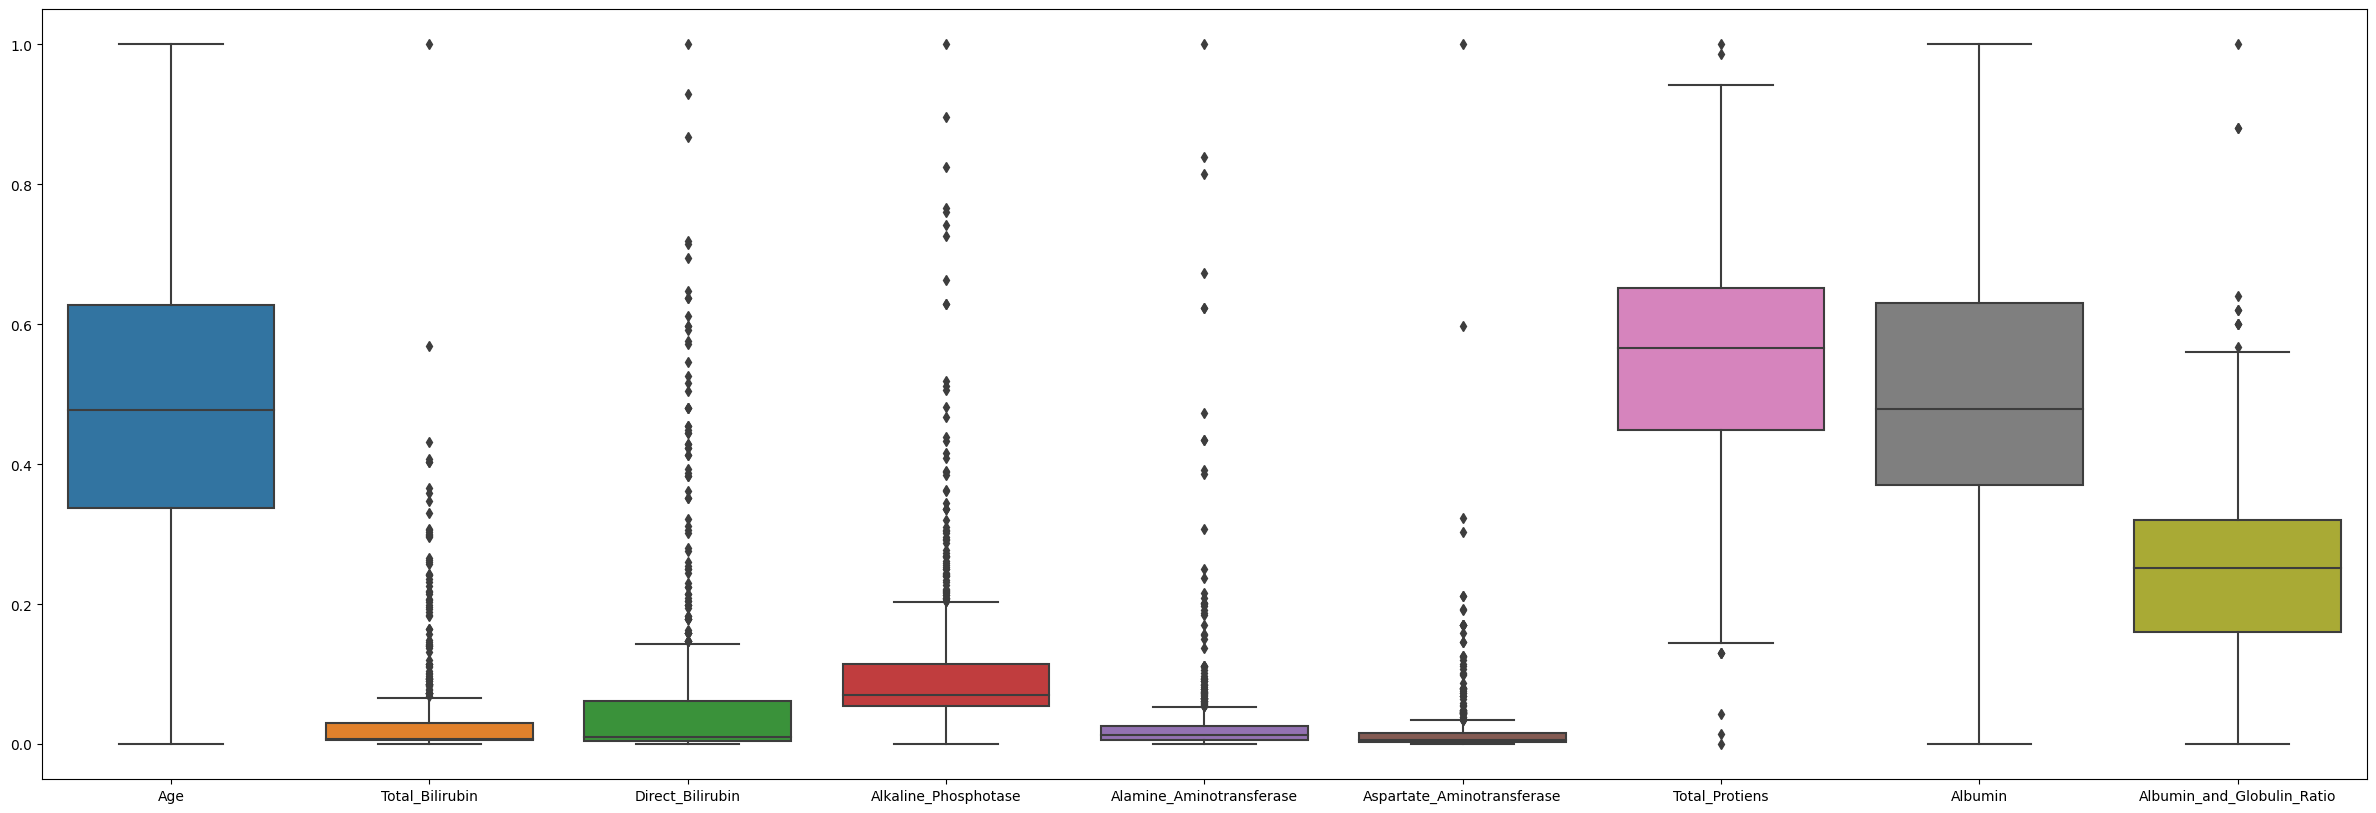

In [21]:
plt.figure(figsize=(30,10))
sns.boxplot(data=f_data.drop(columns=cat_cols+['Dataset']))

In [22]:
list(f_data.duplicated()).count(False) == len(f_data)

False

In [23]:
f_data = f_data.drop_duplicates()
X = f_data.drop(columns = ['Dataset'])
y = f_data['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_df = pd.DataFrame(data = X_train,columns = X_train.columns)
train_df['Dataset'] = y_train

test_df = pd.DataFrame(data = X_test,columns = X_test.columns)
test_df['Dataset'] = y_test

In [24]:
cols = f_data.columns[:-1].values
Q1 = f_data[cols].quantile(0.25)
Q3 = f_data[cols].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
print('InterQuartile Range\n',IQR)
# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# IQR['Solidity']

rm_outlier_df = f_data
for col in cols:
  print(col)
  filter = (rm_outlier_df[{col}] >= Q1[{col}] - 1.5 * IQR[{col}]) & (rm_outlier_df[{col}] <= Q3[{col}] + 1.5 *IQR[{col}])
  rm_outlier_df = rm_outlier_df.loc[filter[col]]
print('new_df shape',f_data.shape)

print('rm_outlier_df',rm_outlier_df.shape)

InterQuartile Range
 Age                           0.290698
Total_Bilirubin               0.024129
Direct_Bilirubin              0.056122
Alkaline_Phosphotase          0.059599
Alamine_Aminotransferase      0.018593
Aspartate_Aminotransferase    0.012553
Total_Protiens                0.202899
Albumin                       0.260870
Albumin_and_Globulin_Ratio    0.160000
Dataset                       1.000000
dtype: float64
Age
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Dataset
new_df shape (570, 11)
rm_outlier_df (383, 11)


In [25]:
rm_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         383 non-null    float64
 1   Total_Bilirubin             383 non-null    float64
 2   Direct_Bilirubin            383 non-null    float64
 3   Alkaline_Phosphotase        383 non-null    float64
 4   Alamine_Aminotransferase    383 non-null    float64
 5   Aspartate_Aminotransferase  383 non-null    float64
 6   Total_Protiens              383 non-null    float64
 7   Albumin                     383 non-null    float64
 8   Albumin_and_Globulin_Ratio  383 non-null    float64
 9   Dataset                     383 non-null    int64  
 10  Gender                      383 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 35.9 KB


In [26]:
p = 0.01
nan_1p_df = f_data.copy()
mask = np.random.choice([True, False], size=nan_1p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_1p_df['Direct_Bilirubin'] = nan_1p_df['Direct_Bilirubin'].mask(mask)

In [27]:
nan_1p_df.info()
#We can see 1% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            563 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB


In [28]:
p = 0.05
nan_5p_df = f_data.copy()

mask = np.random.choice([True, False], size=nan_5p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_5p_df['Direct_Bilirubin'] = nan_5p_df['Direct_Bilirubin'].mask(mask)#We can see 5% data is made null as non null values are not same as total entries
print(nan_5p_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            534 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB
None


In [29]:
p = 0.1
nan_10p_df = f_data.copy()

mask = np.random.choice([True, False], size=nan_10p_df['Direct_Bilirubin'].shape, p=[p,1-p])
nan_10p_df['Direct_Bilirubin'] = nan_10p_df['Direct_Bilirubin'].mask(mask)#We can see 5% data is made null as non null values are not same as total entries
print(nan_10p_df.info())
#We can see 10% data is made null as non null values are not same as total entries
# final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    float64
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            512 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    float64
 4   Alamine_Aminotransferase    570 non-null    float64
 5   Aspartate_Aminotransferase  570 non-null    float64
 6   Total_Protiens              570 non-null    float64
 7   Albumin                     570 non-null    float64
 8   Albumin_and_Globulin_Ratio  566 non-null    float64
 9   Dataset                     570 non-null    int64  
 10  Gender                      570 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 53.4 KB
None


Data Imputation

1. With Mean values

In [30]:
nan_10p_df_mean = nan_10p_df.fillna(nan_10p_df.mean())
nan_1p_df_mean = nan_1p_df.fillna(nan_1p_df.mean())
nan_5p_df_mean = nan_5p_df.fillna(nan_5p_df.mean())

2. Dropping these Nan values

In [31]:
nan_10p_df_drop = nan_10p_df.dropna()
print('nan_10p_df_drop shape:',nan_10p_df_drop.shape)
nan_1p_df_drop = nan_1p_df.dropna()
print('nan_1p_df_drop shape:',nan_1p_df_drop.shape)
nan_5p_df_drop = nan_5p_df.dropna()
print('nan_5p_df_drop shape:',nan_5p_df_drop.shape)

nan_10p_df_drop shape: (508, 11)
nan_1p_df_drop shape: (559, 11)
nan_5p_df_drop shape: (531, 11)


3. Fill with KNN

In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset

def impute_knn(impute_df,imputer):

  X = impute_df
  imputer.fit(X)
  Xtrans = imputer.transform(X)

  res_df = pd.DataFrame(data=Xtrans, columns = impute_df.columns[:])

  return res_df

nan_1p_df_knn = impute_knn(nan_1p_df, imputer)
nan_5p_df_knn = impute_knn(nan_5p_df, imputer)
nan_10p_df_knn = impute_knn(nan_10p_df, imputer)

Check how well imputer mean

In [33]:
len(cols)

10

Text(0.5, 0, 'Direct_Bilirubin')

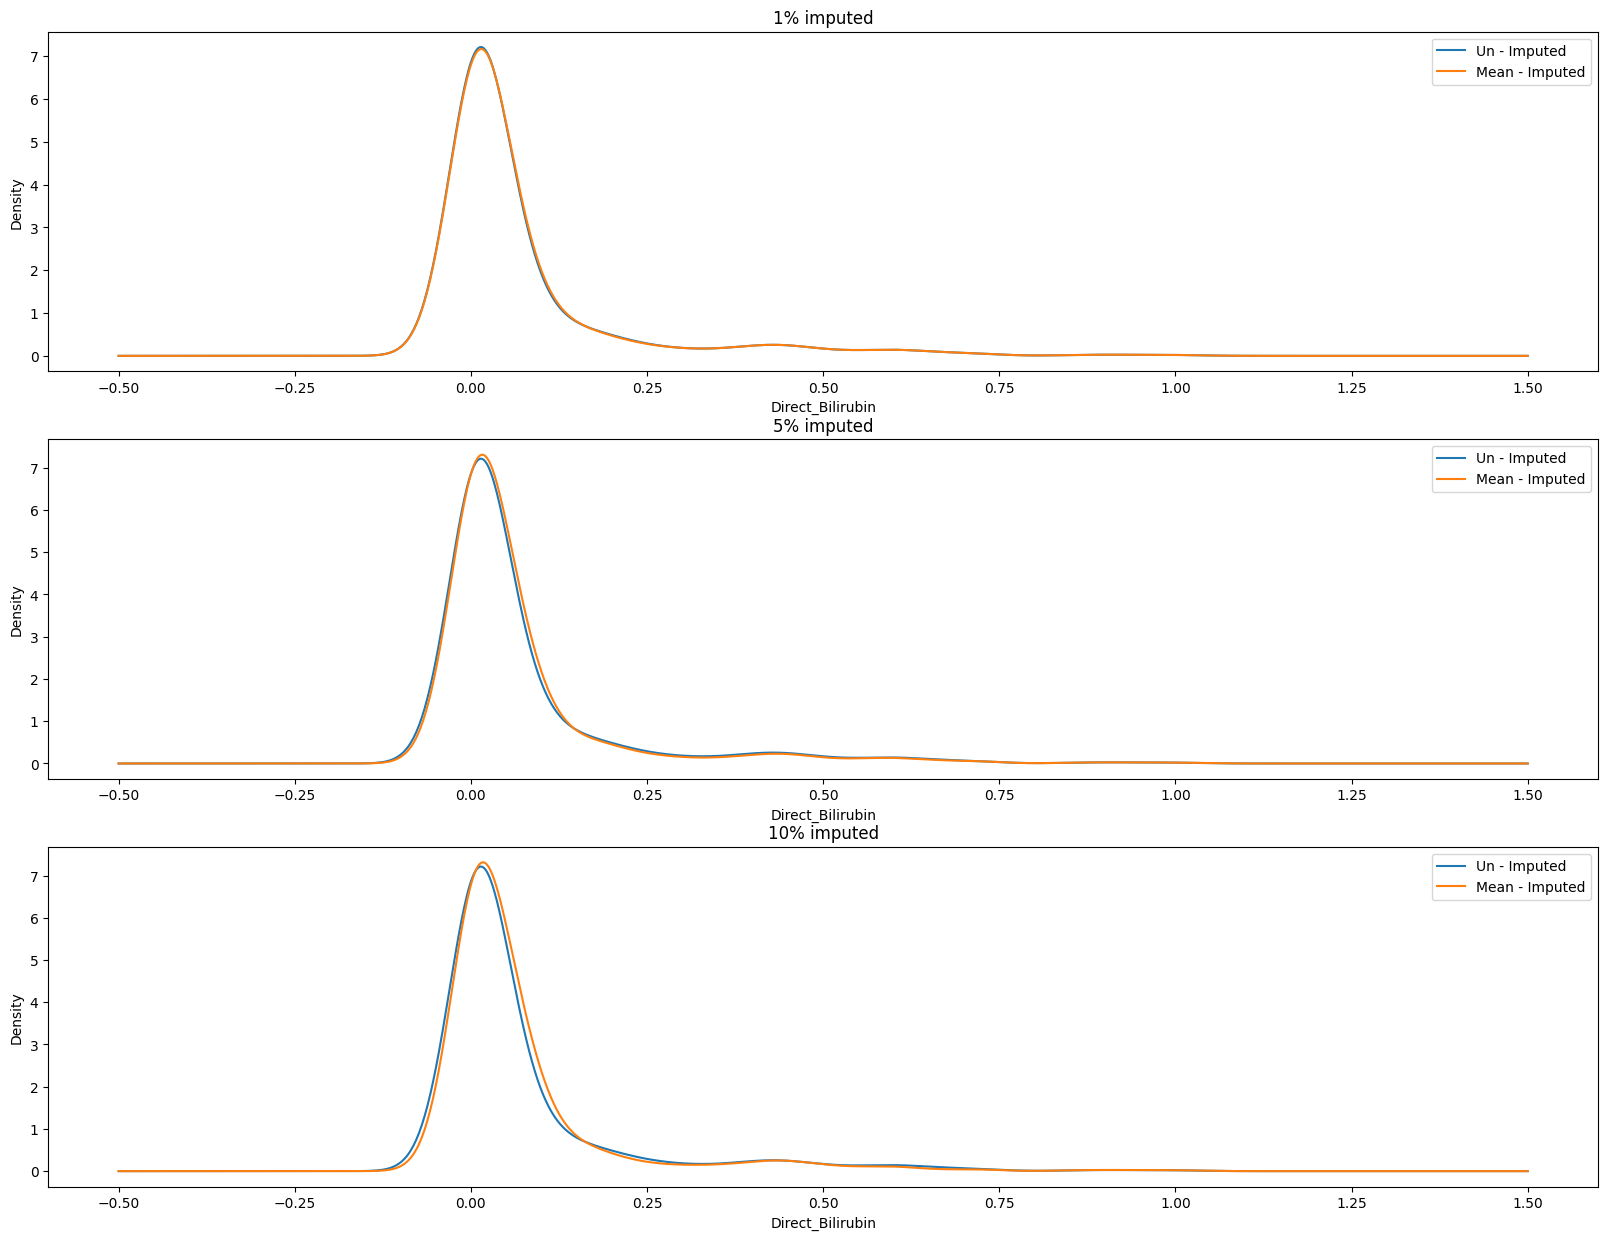

In [34]:
#1% data
col = 'Direct_Bilirubin'
plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,1)
f_data[col].plot(kind="kde")
nan_1p_df_mean[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")
  


#5% data
# plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,2)
f_data[col].plot(kind="kde")
nan_5p_df_mean[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")
  

#10% data
# plt.figure(figsize=(20,15))

# for i, col in enumerate(cols):
plt.subplot(3,1,3)
f_data[col].plot(kind="kde")
nan_10p_df_mean[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Mean - Imputed"])
plt.xlabel(f"{col}")

Check how well imputer drop

Text(0.5, 0, 'Direct_Bilirubin')

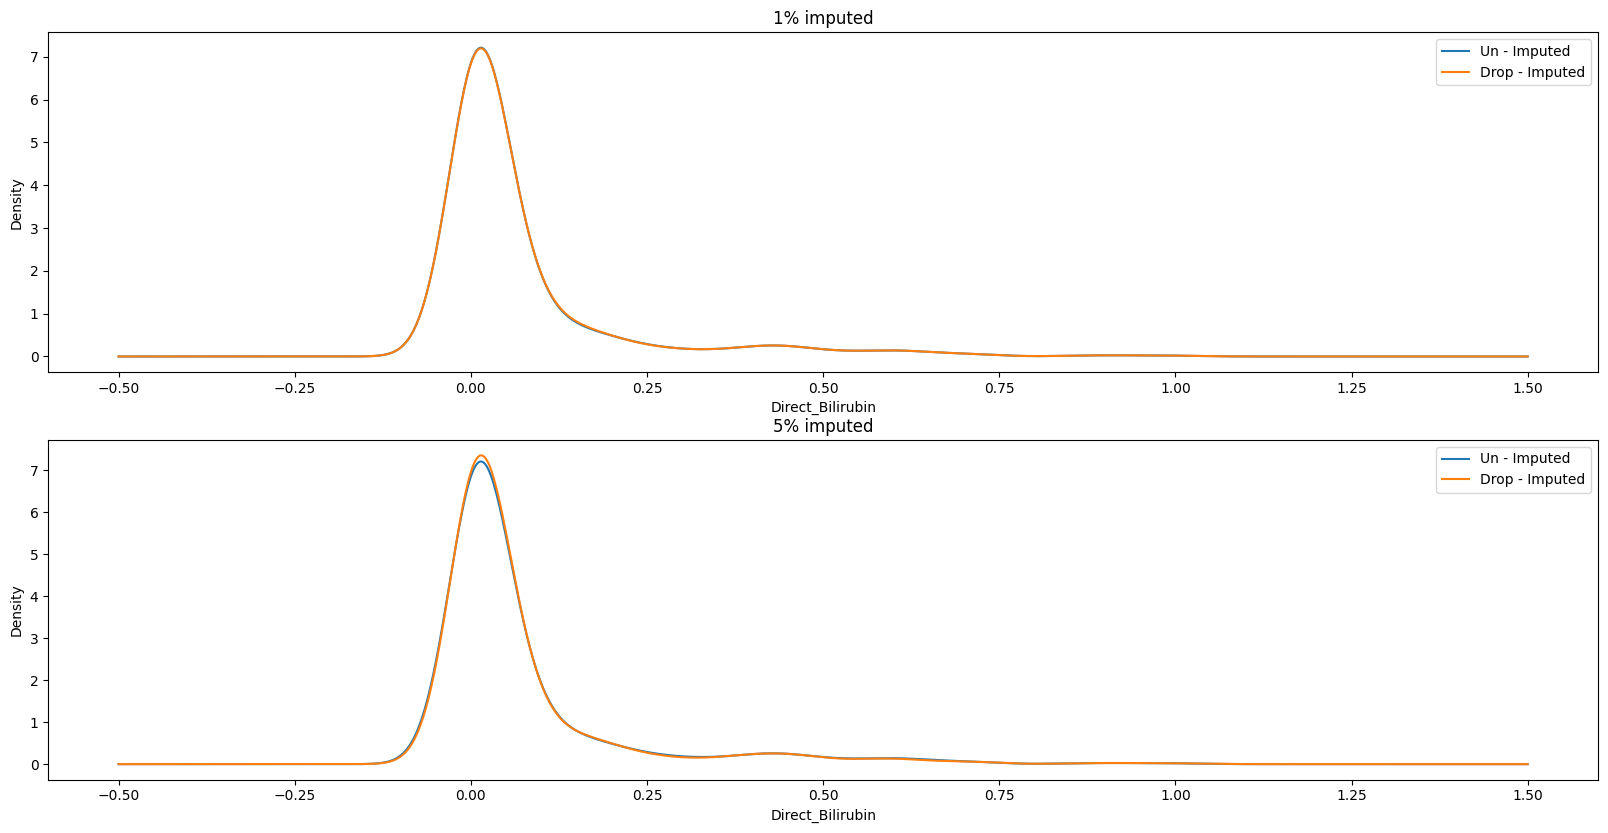

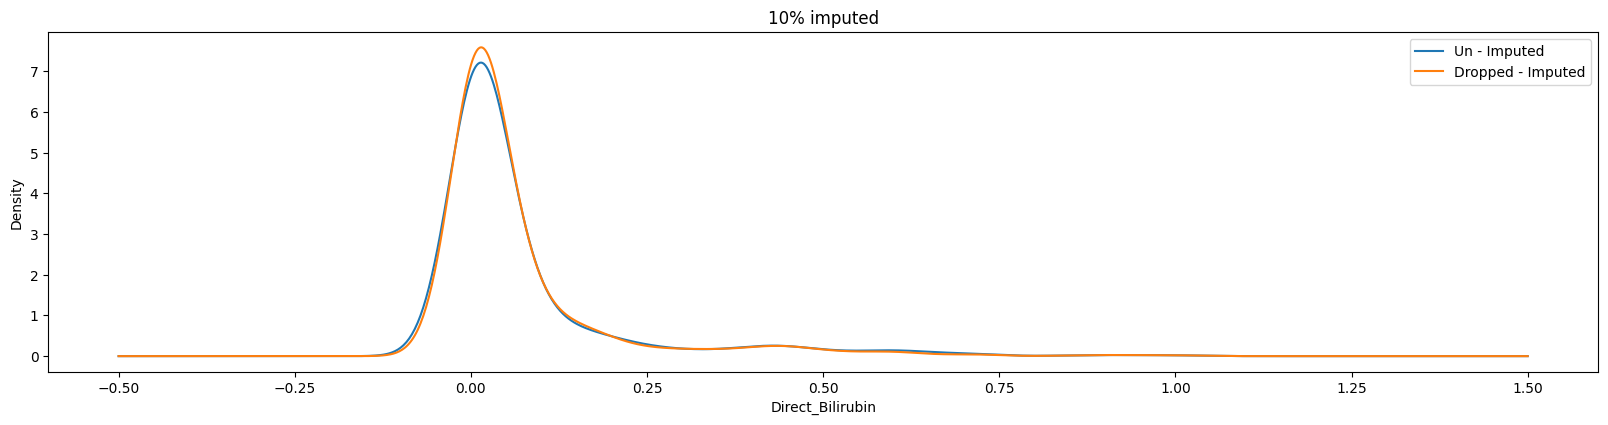

In [35]:
#KNN imputation density plots

#1% data
col = 'Direct_Bilirubin'

plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,1)
i+=1
f_data[col].plot(kind="kde")
nan_1p_df_knn[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")
  


#5% data
# plt.figure(figsize=(20,15))
# i = 0
# for col in cols[:]:
plt.subplot(3,1,2)
# i+=1
f_data[col].plot(kind="kde")
nan_5p_df_knn[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")
  

#10% data
plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,3)
# i+=1
f_data[col].plot(kind="kde")
nan_10p_df_knn[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Dropped - Imputed"])
plt.xlabel(f"{col}")

In [36]:
f_data = f_data.dropna()
X = f_data.drop(columns=["Dataset"])
y = f_data['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Text(0.5, 0, 'Direct_Bilirubin')

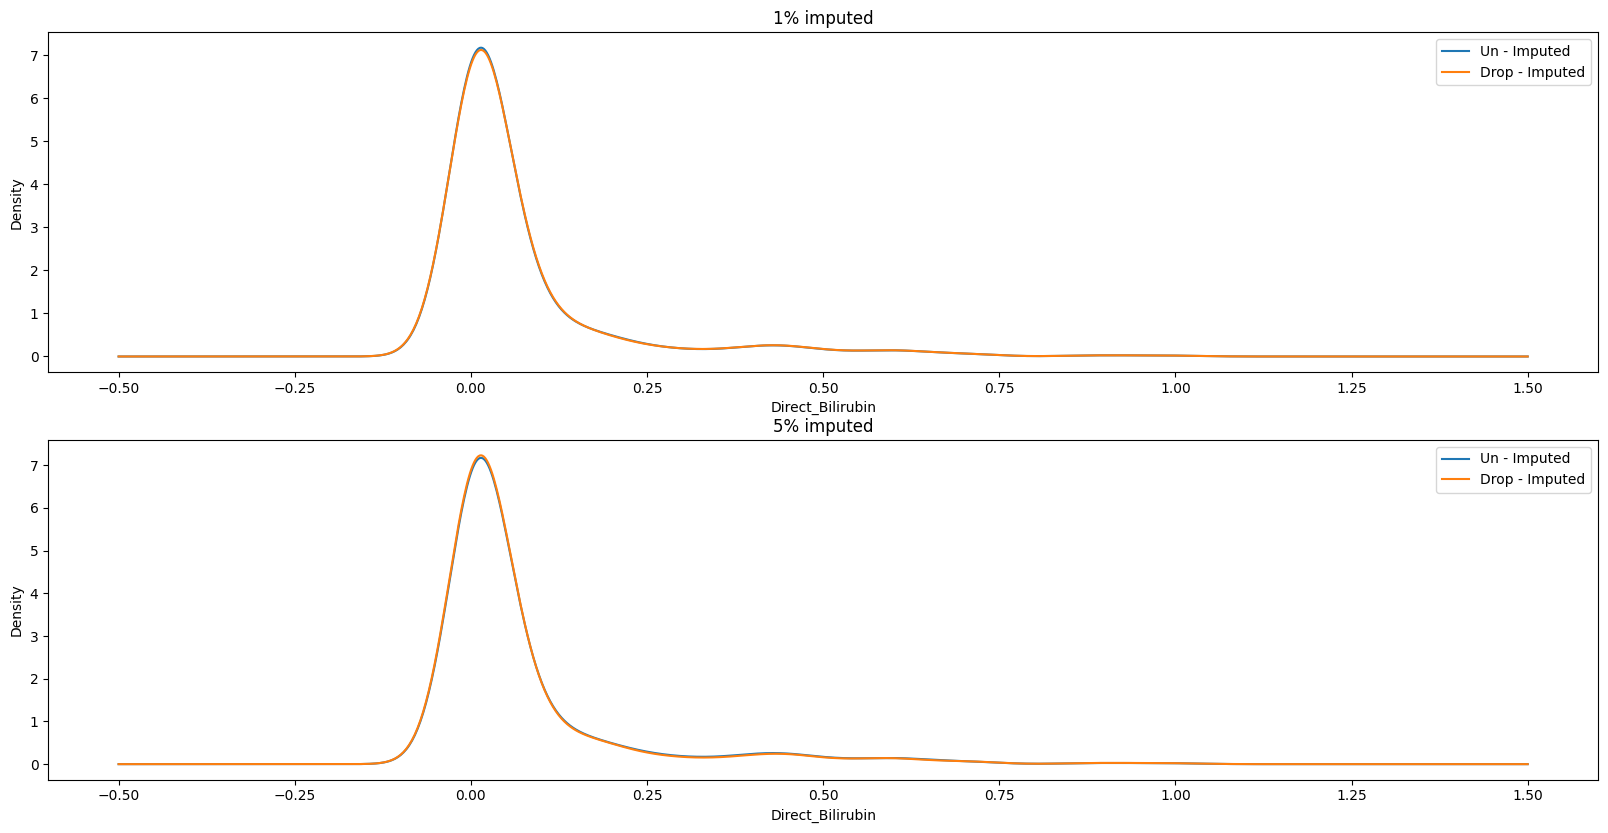

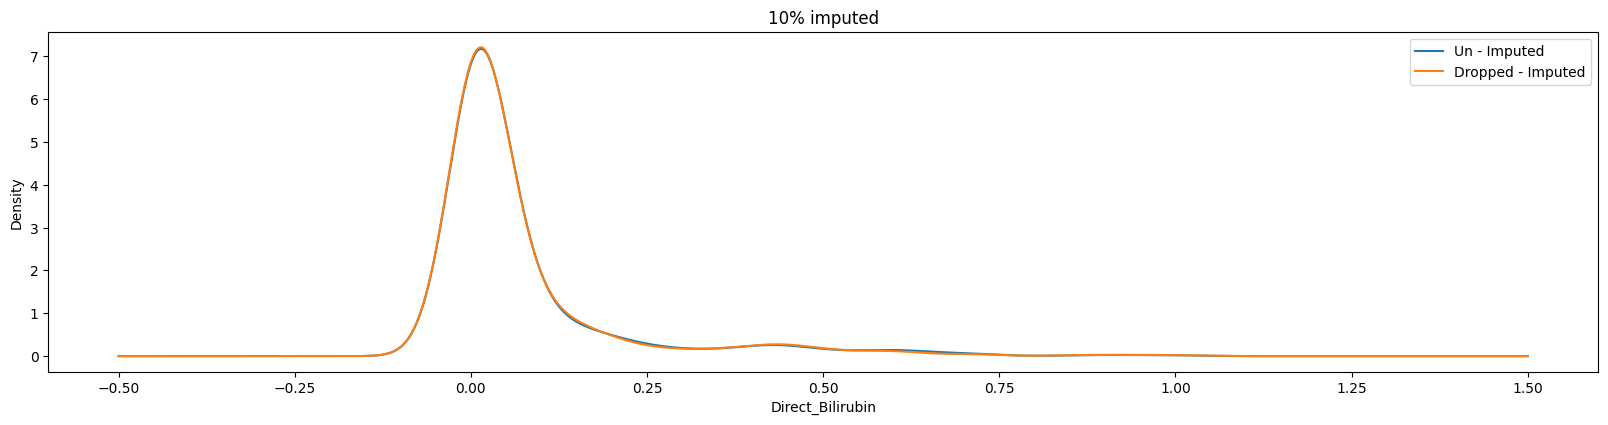

In [37]:
#Dropped imputation density plots

#1% data
col = 'Direct_Bilirubin'

plt.figure(figsize=(20,15))

# i = 0
# for col in cols[:]:
plt.subplot(3,1,1)
i+=1
f_data[col].plot(kind="kde")
nan_1p_df_drop[col].plot(kind="kde")
plt.title('1% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")
  


#5% data
# plt.figure(figsize=(20,15))
# i = 0
# for col in cols[:]:
plt.subplot(3,1,2)
# i+=1
f_data[col].plot(kind="kde")
nan_5p_df_drop[col].plot(kind="kde")
plt.title('5% imputed')
plt.legend(["Un - Imputed", "Drop - Imputed"])
plt.xlabel(f"{col}")
  

#10% data
plt.figure(figsize=(20,15))


plt.subplot(3,1,3)
# i+=1
f_data[col].plot(kind="kde")
nan_10p_df_drop[col].plot(kind="kde")
plt.title('10% imputed')
plt.legend(["Un - Imputed", "Dropped - Imputed"])
plt.xlabel(f"{col}")

In [38]:
clf = RandomForestClassifier(max_depth=2, random_state=0) 
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
clf.score(X_test, y_test)

0.6705882352941176

### *Questions and Answers*

## Q1. What are the data types? (Only numeric and categorical)

Ans: The Indian Liver Patient dataset has 416 rows and 11 columns. The columns and their respective data types are:

Age: Numeric (Continuous)
Gender: Categorical (Nominal)
Total_Bilirubin: Numeric (Continuous)
Direct_Bilirubin: Numeric (Continuous)
Alkaline_Phosphotase: Numeric (Continuous)
Alamine_Aminotransferase: Numeric (Continuous)
Aspartate_Aminotransferase: Numeric (Continuous)
Total_Protiens: Numeric (Continuous)
Albumin: Numeric (Continuous)
Albumin_and_Globulin_Ratio: Numeric (Continuous)
Dataset: Categorical (Nominal) [values: 1 (liver disease), 2 (no liver disease)]

## Q2.Are there missing values?

Ans: The column "Albumin_and_Globulin_Ratio" has 4 missing values. 
Therefore, there are missing values in the dataset.

## Q3.What are the likely distributions of the numeric variables?

Ans: we can observe the following distributions:

Age: Slightly right-skewed distribution.

Total_Bilirubin: Right-skewed distribution.

Direct_Bilirubin: Right-skewed distribution.

Alkaline_Phosphotase: Approximately normal distribution.

Alamine_Aminotransferase: Highly right-skewed distribution.

Aspartate_Aminotransferase: Highly right-skewed distribution.

Total_Protiens: Approximately normal distribution.

Albumin: Approximately normal distribution.

Albumin_and_Globulin_Ratio: Slightly right-skewed distribution.

##Q4.  Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Ans: 1.Correlation matrix: We can calculate the correlation coefficients between the independent variables and the target variable. The higher the absolute value of the correlation coefficient, the stronger the relationship between the two variables.

2.Univariate feature selection: We can use statistical tests to determine the relationship between each independent variable and the target variable. The variables with the highest test statistics are more likely to be useful for predicting the target variable.

3.Recursive feature elimination: We can use a machine learning model to recursively remove the least important independent variables and select the ones with the highest importance scores.

##Q5. Which independent variables have missing data? How much? 

Ans: The independent variable "Albumin_and_Globulin_Ratio" has 4 missing values. The rest of the independent variables have no missing values.

##Q6. Do the training and test sets have the same data?

Ans: The training and test sets do not have the same data

## Q7.In the predictor variables independent of all the other predictor variables?

Ans: No, the predictor variables is not independent of all other predictor variables.They have a slight correlation

## Q8. Which predictor variables are the most important?

Ans: The output shows the feature importance scores for each predictor variable, where the higher the score, the more important the feature. Based on the feature importance scores, we can see that the most important predictor variable is Total_Bilirubin with a score of 0.170, followed by Direct_Bilirubin with a score of 0.130 and Alkaline_Phosphotase with a score of 0.129.

##Q9. Do the ranges of the predictor variables make sense?

Ans: The output shows the summary statistics of the predictor variables. We can see that the ranges of the variables make sense, for example, Age ranges from 4 to 90 which is within the reasonable range of human age, Total_Protiens ranges from 0.6 to 9.6 which is within the range of normal protein levels in human blood, and so on. However, we can also see that some variables have a wide range, for example, Direct_Bilirubin ranges from 0.1 to 19.7, which indicates that there may be outliers in the data.

##10. What are the distributions of the predictor variables?

Ans: Some variables have a bimodal distribution, such as Total_Bilirubin, Direct_Bilirubin, and Alkaline_Phosphotase, indicating that there may be two distinct groups or clusters in the data. Other variables such as Albumin and Albumin_Globulin_Ratio have a single peak, indicating a unimodal distribution.

Overall, the distributions of the predictor variables suggest that some preprocessing or feature engineering may be necessary before building a predictive model.

## Q11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?


Ans: The decision to remove or keep outliers can have a significant effect on the final predictive model, as outliers may have a strong influence on the model's accuracy and generalization performance.


##Q12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Ans: To test the performance of imputation methods, we can randomly remove 1%, 5%, and 10% of the data, impute the missing values using at least 3 methods, and evaluate their performance by measuring the % error on residuals for numeric data and checking for bias and variance of the error.


# Model Interpretability

In [40]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=7f137a15efbb8ee1574f4f23ca89f1af8a6872881788ef8c7c53e1bd40ed08c5
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [42]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble
import statsmodels.api as sd
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import random

import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")

# importing shap
!pip install shap
import shap 

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading and Analyzing the Dataset

In [43]:
#Loading the CSV File
data=pd.read_csv("https://raw.githubusercontent.com/Nupoor1998/DataScience_Assignment1/main/indian_liver_patient.csv")


In [44]:
#Dropping the unnecessary features 
data=data.drop(['Albumin_and_Globulin_Ratio'],axis=1)

In [45]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Dataset  
0      3.3        1  
1      3.2        1  
2      3.3        1  
3      3.4        1  
4      2.4        1

In [46]:
data.shape

(583, 10)

In [47]:
data.describe()  # Statistical description of our dataset

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin     Dataset  
count  583.000000  583.000000  
mean     3.141852    1.286449  
std      0.795519    0.452490  
min      0.900000    1.000000  
25%      2.600000    1.000000  
50%      3.100000    1.000000  
75%      3.800000    2.000000  
max      5.500000    2.000000

In [48]:
#taking the basic information of all the columns in the given dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 45.7+ KB


In [49]:
#Defining the Response and the Predictors
X=data.drop(['Age'],axis=1)
y=data['Age']

In [50]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [51]:
from statsmodels.tools.tools import add_constant

#Calculating VIF 

data.dropna(inplace=True)

numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_vars]
numeric_data = add_constant(numeric_data)

vif = pd.Series([variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])], index=numeric_data.columns)

print(vif)


const                         68.953034
Age                            1.111721
Total_Bilirubin                4.273483
Direct_Bilirubin               4.457668
Alkaline_Phosphotase           1.114894
Alamine_Aminotransferase       2.831963
Aspartate_Aminotransferase     2.803164
Total_Protiens                 2.993896
Albumin                        3.337541
Dataset                        1.132953
dtype: float64


In [52]:
cols= ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens','Albumin']
model = sm.OLS(y_train,sm.add_constant(X_train[cols])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     6.385
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.53e-07
Time:                        00:52:56   Log-Likelihood:                -1920.8
No. Observations:                 466   AIC:                             3858.
Df Residuals:                     458   BIC:                             3891.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Text(0.5, 1.0, 'Variable Correlation')

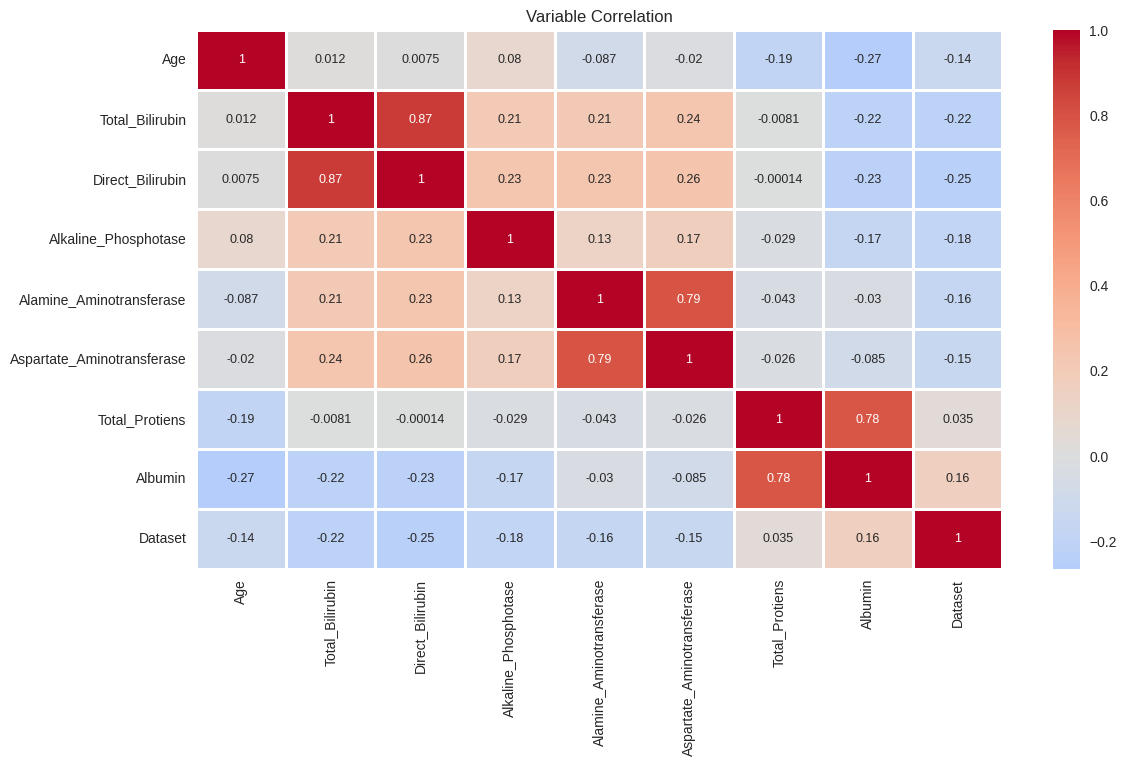

In [53]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(13,7))

sns.heatmap(data.corr(),center=0, linewidths=0.9,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Performing Linear Regreassion

In [54]:
#Computing Linear Regression model for Melbourne dataset
def linear_reg(X_train,y_train,X_test,y_test):
    linear_reg = LinearRegression()
    linear_reg_model = linear_reg.fit(X_train,y_train)
    print('Train set')
    pred=linear_reg_model.predict(X_train)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_train,pred)))
    print('Test set')
    pred=linear_reg_model.predict(X_test)
    model_lr=linear_reg_model.predict(X_test)
    print('Linear Regression Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('Linear Regression r2_score :{}'.format(r2_score(y_test,pred))) 

In [55]:
from sklearn import linear_model
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X_train['Gender'] = le.fit_transform(X_train['Gender'])

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [56]:
cols1= ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens','Albumin']

In [57]:
#Computing R2 for testing and training data
linear_reg(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
Linear Regression Mean Squared error :222.6703894760206
Linear Regression r2_score :0.08890656929609819
Test set
Linear Regression Mean Squared error :306.6724960588016
Linear Regression r2_score :0.05569888674546397


# SHAP Analysis on Linear Regression model

SHAP values for each feature represent the change in the expected model prediction when conditioning on that feature. For each feature, SHAP value explains the contribution to explain the difference between the average model prediction and the actual prediction of the instance.The essence of Shapley value is to measure the contributions to the final outcome from each player separately among the coalition, while preserving the sum of contributions being equal to the final outcome.SHAP values in model explanation can measure the input features contribution to individual predictions.

In [58]:
%%capture
!pip install shap
import shap 

In [59]:
import shap
shap.initjs()

In [60]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.sample(frac=0.01,random_state=200)
#LinearExplainer is used as linear regression model is used
explainer = shap.LinearExplainer(model, X, feature_perturbation="interventional") 
shap_values = explainer.shap_values(X) #Saving SHAP values

In [61]:
#Initialize java script
shap.initjs()

 #Explain one row in the data with the
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [62]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

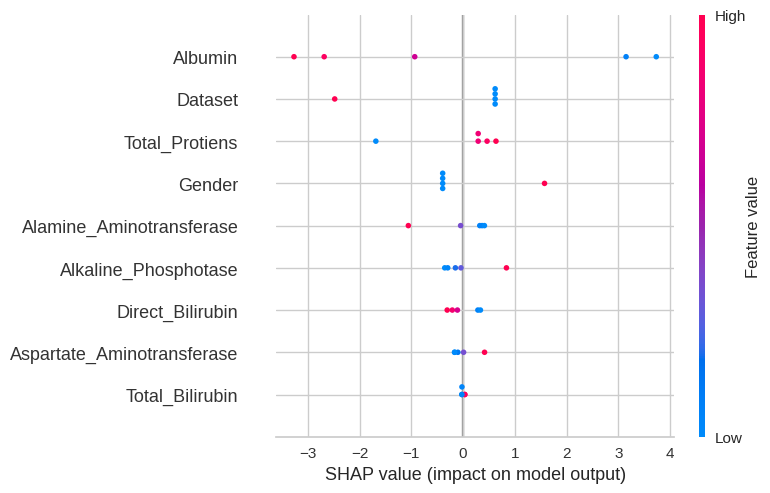

In [63]:
shap.summary_plot(shap_values, X, feature_names=list(X_train.columns))

In [65]:
#Initializing explainer from shap, lm is our trained model
explainer_shap=shap.LinearExplainer(model=model, masker=X_train)

#Computing shap values for train dataset
shap_values = explainer_shap.shap_values(X_train)

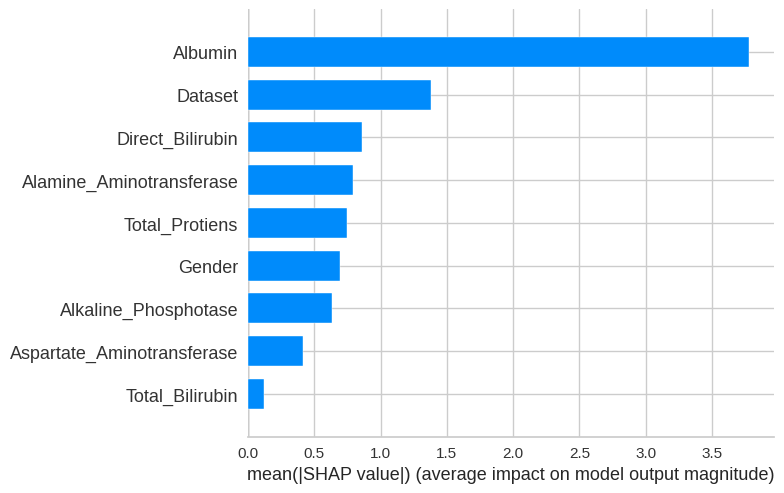

In [66]:

shap.summary_plot(shap_values, X, plot_type="bar")

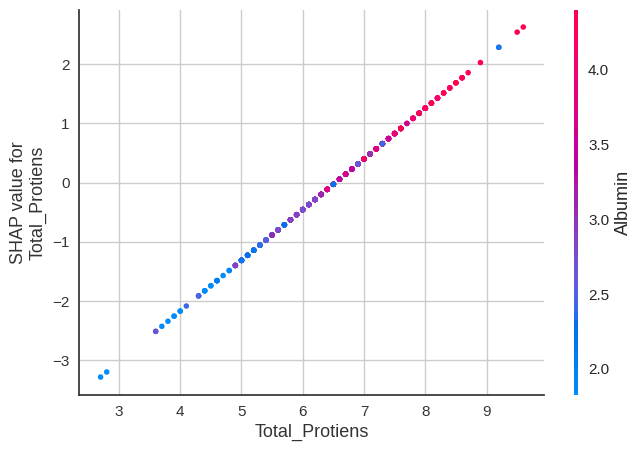

In [67]:

shap.dependence_plot("Total_Protiens", shap_values, X_train)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import shap

#Seperating the dependent and independent variable from the main dataset
X=data.drop(['Age'],axis=1)
y=data['Age']

le = preprocessing.LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

regressor = LinearRegression()
linear_reg = regressor.fit(X, y)

# compute SHAP values
explainer = shap.Explainer(linear_reg, X)
shap_values = explainer(X)


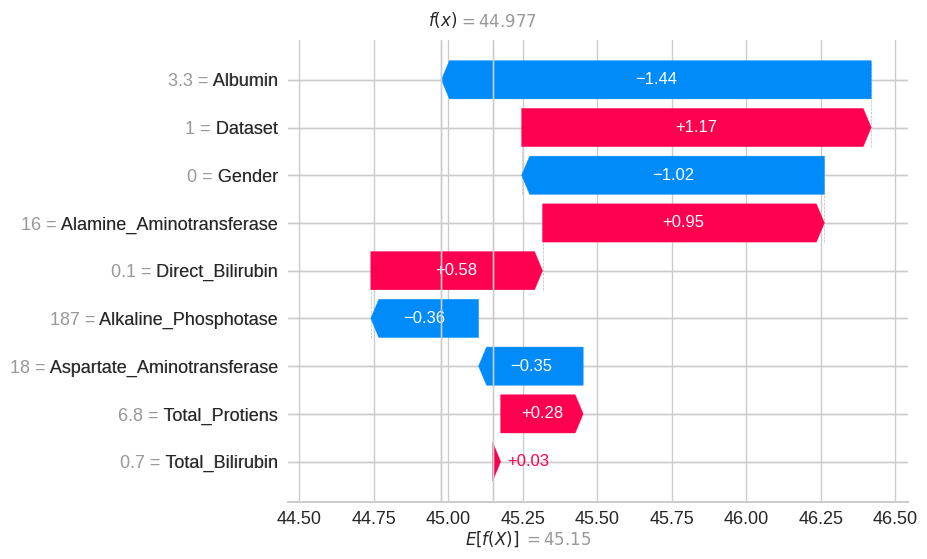

In [69]:
shap.plots.waterfall(shap_values[0])

For the linear regression model from the plots it can be interpreted that Albumin, Gender and Alkaline_Phosphotase are the important features for this regressor model. These are the major features in determining the Age of the person.

# Performing Random Forest 

In [70]:
def ramdomforest(X_train,y_train,X_test,y_test):
    rf = RandomForestRegressor()
    rf_model = rf.fit(X_train,y_train)
    print('Train set')
    pred=rf_model.predict(X_train)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_train,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_train,pred)))
    print('Tesst set')
    pred=rf_model.predict(X_test)
    print('ramdomforest Mean Squared error :{}'.format(mean_squared_error(y_test,pred)))
    print('ramdomforest r2_score :{}'.format(r2_score(y_test,pred)))

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train) 

RandomForestRegressor()

In [71]:
ramdomforest(X_train[cols1],y_train,X_test[cols1],y_test)

Train set
ramdomforest Mean Squared error :32.42822832618025
ramdomforest r2_score :0.8673144378699228
Tesst set
ramdomforest Mean Squared error :271.0477837606838
ramdomforest r2_score :0.16539393900745403


# SHAP Analysis on Random Forest Model

In [74]:
%%capture
!pip install shap
import shap 

In [75]:
# Giving input as 1% of whole dataset as SHAP cant handle large dataset
X = X_train.head(10)
 # Using Tree explainer as this is tree based classifier model
explainer = shap.TreeExplainer(random_forest)
#Saving shap values
shap_values = explainer.shap_values(X) 

In [76]:
shap.initjs() #Initialize java script
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:]) #Explain one row in the data with the model

In [77]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)  

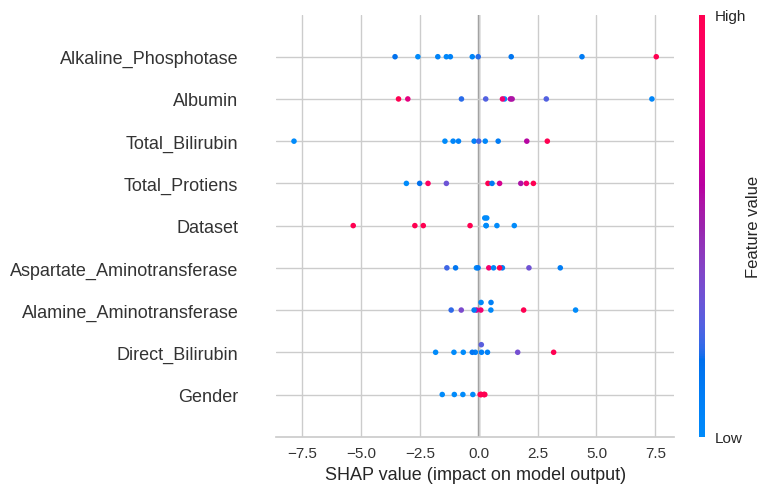

In [78]:
shap.initjs()
shap.summary_plot(shap_values, X) 

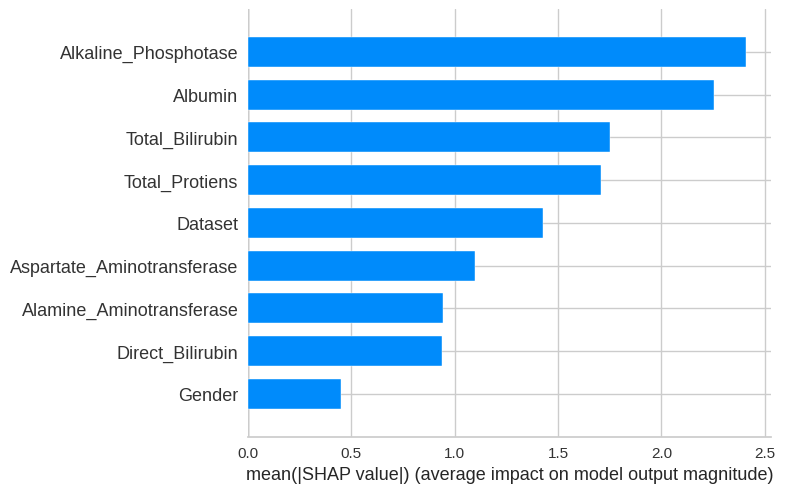

In [79]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
iris = load_iris()

model_rf1 = RandomForestRegressor(n_estimators=10)
# Train
model_rf1.fit(iris.data, iris.target)
# Extract single tree
estimator = model_rf1.estimators_[5]

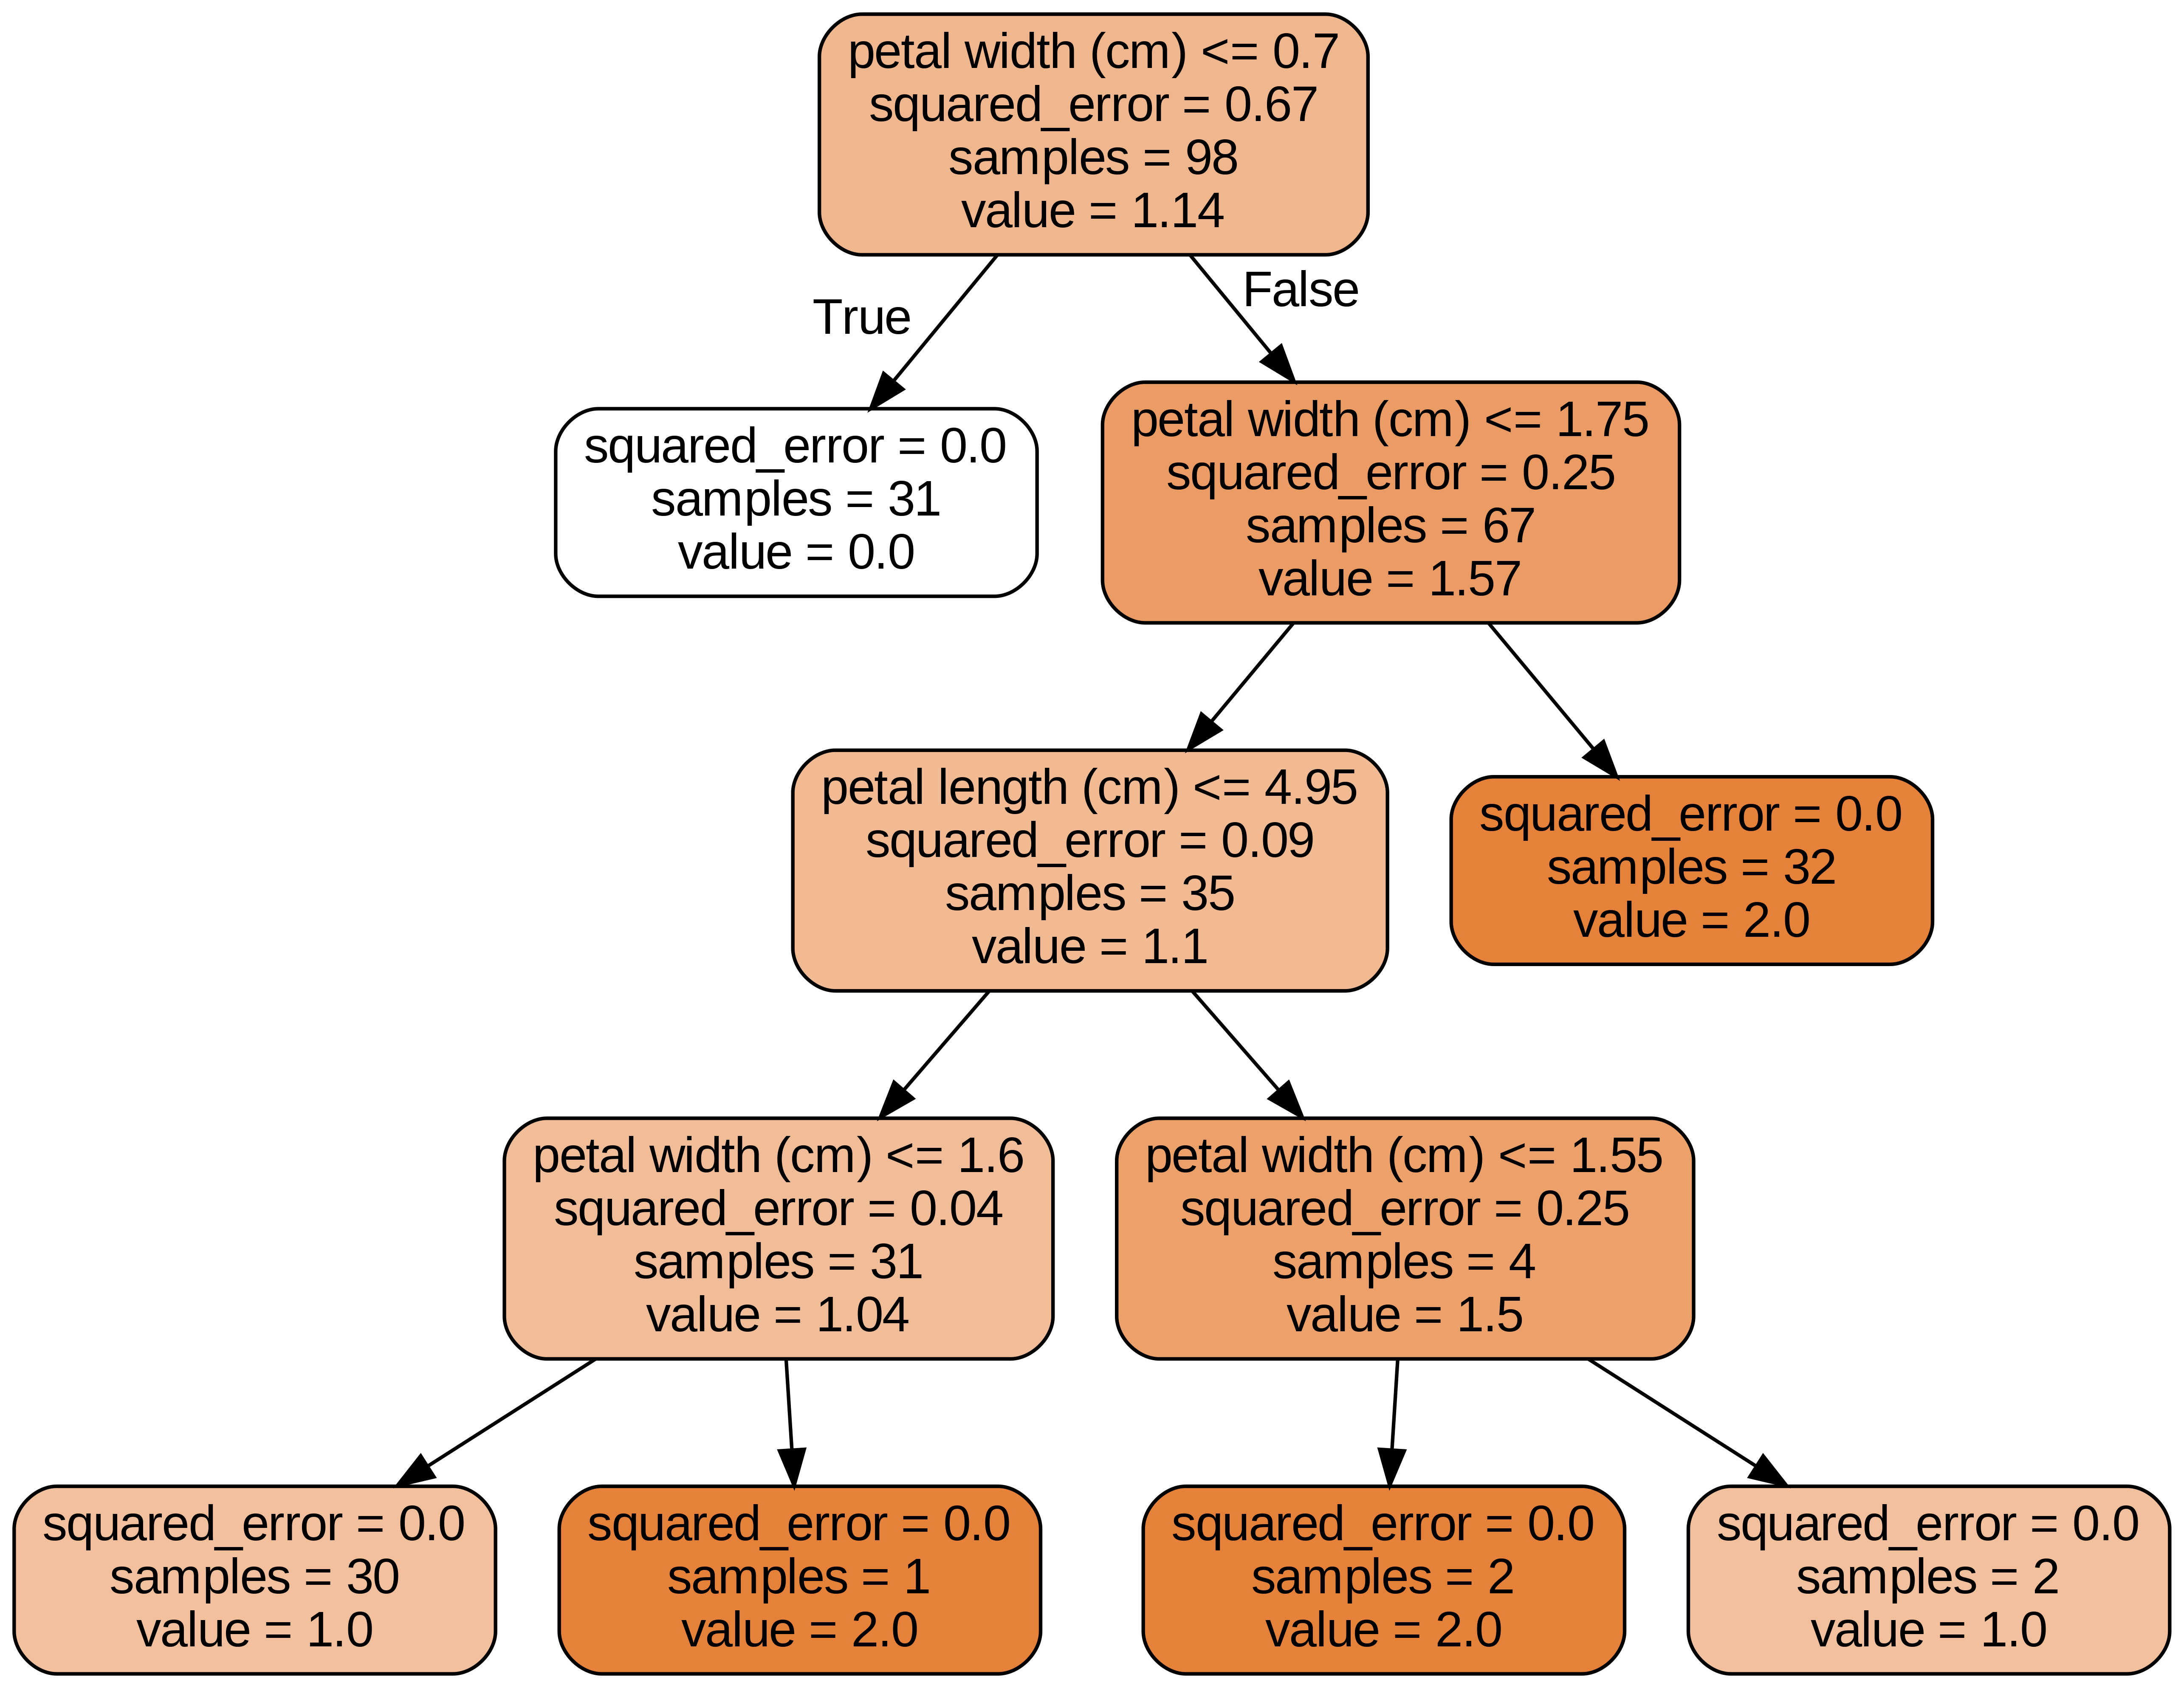

In [81]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in colab notebook
from IPython.display import Image
Image(filename = 'tree.png')

For the random forest model according to SHAP Analysis the important features to determine the target variable 'Age' are Albumin, Gender and Alkaline_Phosphotase. Albumin is the common feature which is important for both Random Forest and Linear Regression Model. Albumin has the highest value of feature importance and is placed first on the scale.

# Using AutoML to Identify Best Model

In [82]:
#importing all the necessary libraries

import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
import scipy

In [83]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [84]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [85]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:6913..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8jsy29ac
  JVM stdout: /tmp/tmp8jsy29ac/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8jsy29ac/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:6913
Connecting to H2O server at http://127.0.0.1:6913 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_g8yauu
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:6913
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [86]:
# Create a 80/20 train/test split
url = "https://raw.githubusercontent.com/Nupoor1998/DataScience_Assignment1/main/indian_liver_patient.csv"
df = h2o.import_file(path = url)
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [87]:
# Set the features and target
X=df.columns
print(X)

y ='Age'
X.remove(y) 
print(X)

['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']
['Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


In [88]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
# Passing the training and testing dataset through H20 AutomML
aml.train(x=X,y=y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_11352


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 71.80510902999217
RMSE: 8.47378953184419
MAE: 6.946003517785702
RMSLE: 0.2556700307922922
Mean Residual Deviance: 71.80510902999217
R^2: 0.7188986929074535
Null degrees of freedom: 463
Residual degrees of freedom: 459
Null deviance: 118525.13577586226
Residual deviance: 33317.570589916366
AIC: 3311.890371101112

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 220.25001924051736
RMSE: 14.840822727885316
MAE: 12.07264490593496
RMSLE: 0.40155704428732364
Mean Residual Deviance: 220.25001924051736
R^2: 0.13776931569301298
Null degrees of freedom: 463
Residual degrees of freedom: 459
Null deviance: 118726.94278817506
Residual deviance: 102196.00892760005
AIC: 3831.945154222632

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     12.0808   0.342482   11.5771       12.3872       12.0579       12.411        11.971
mean_residual_deviance  219.181   15.3414    195.13        237.307       220.525       224.799       218.143
mse                     219.181   15.3414    195.13        237.307       220.525       224.799       218.143
null_deviance           23745.4   2747.44    23156.5       28258         21945.9       21271         24095.5
r2                      0.136924  0.0539391  0.224227      0.141391      0.0823211     0.105616      0.131066
residual_deviance       20366.3   2397.06    17952         24205.3       20067.8       18883.1       20723.6
rmse                    14.7973   0.523745   13.9689       15.4048       14.8501       14.9933       14.7697
rmsle                   0.400598  0.0261241  0.367804      0.412654      0.384378      0.402299      0.435856

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [89]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_11352  14.8408  220.25   12.0726  0.401557                   220.25
StackedEnsemble_AllModels_6_AutoML_1_20230410_11352     14.8689  221.085  11.9354  0.401771                   221.085
StackedEnsemble_BestOfFamily_5_AutoML_1_20230410_11352  14.8839  221.53   12.1028  0.402507                   221.53
StackedEnsemble_BestOfFamily_4_AutoML_1_20230410_11352  14.9016  222.058  12.1076  0.403213                   222.058
StackedEnsemble_AllModels_4_AutoML_1_20230410_11352     14.9336  223.012  12.0146  0.404878                   223.012
StackedEnsemble_AllModels_2_AutoML_1_20230410_11352     15.0626  226.882  12.3357  0.40684                    226.882
GBM_grid_1_AutoML_1_20230410_11352_model_8              15.1023  228.079  12.0244  0.40715                    228.079
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_11352  15

In [90]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_7_AutoML_1_20230410_11352': 0,
 'StackedEnsemble_AllModels_6_AutoML_1_20230410_11352': 1,
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20230410_11352': 2,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230410_11352': 3,
 'StackedEnsemble_AllModels_4_AutoML_1_20230410_11352': 4,
 'StackedEnsemble_AllModels_2_AutoML_1_20230410_11352': 5,
 'GBM_grid_1_AutoML_1_20230410_11352_model_8': 6,
 'GLM_1_AutoML_1_20230410_11352': 32}

In [91]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

6


In [92]:
#Printing the best model
print("The best model is - " , best_model.algo)

The best model is -  gbm


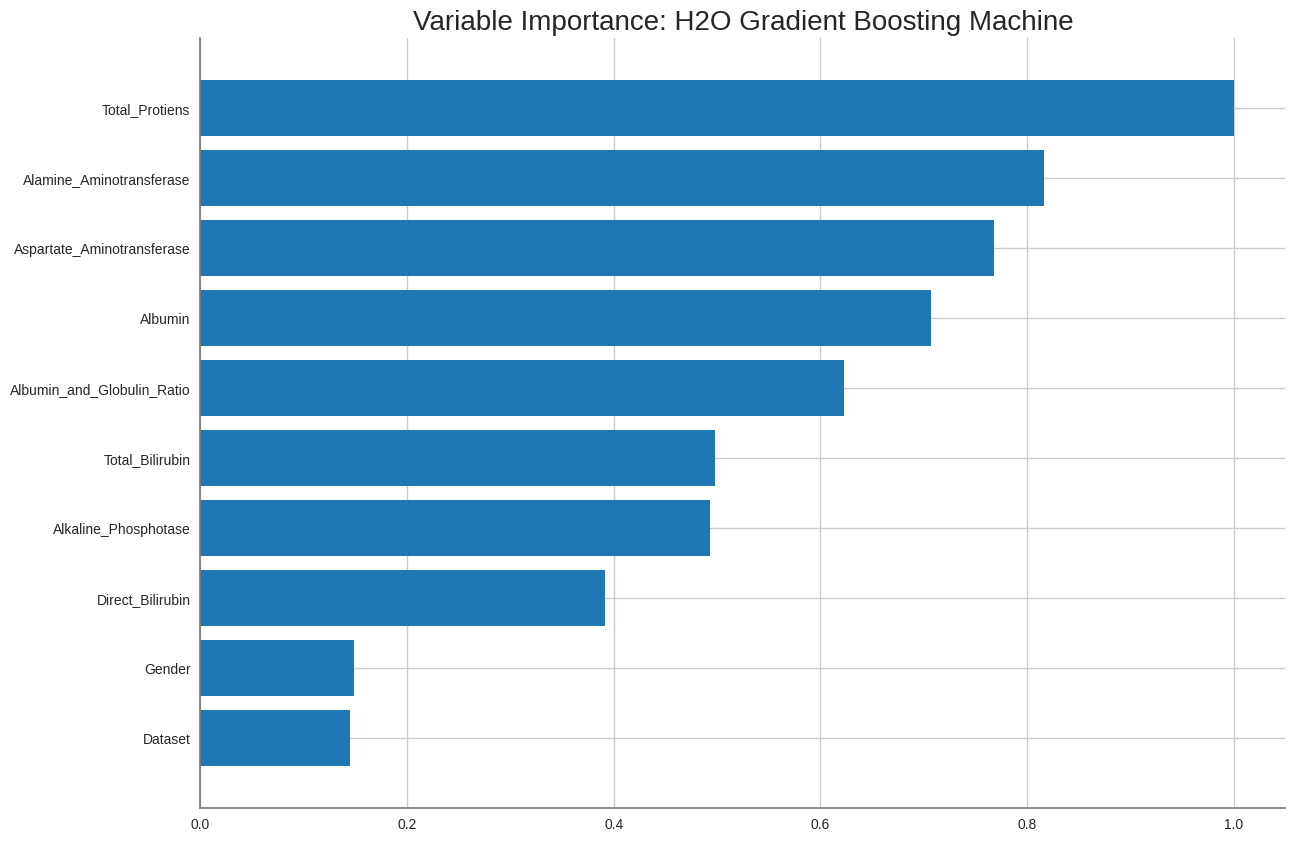

<Figure size 800x550 with 0 Axes>

In [93]:
#plot variables in order of their importance for price prediction
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()

32
glm


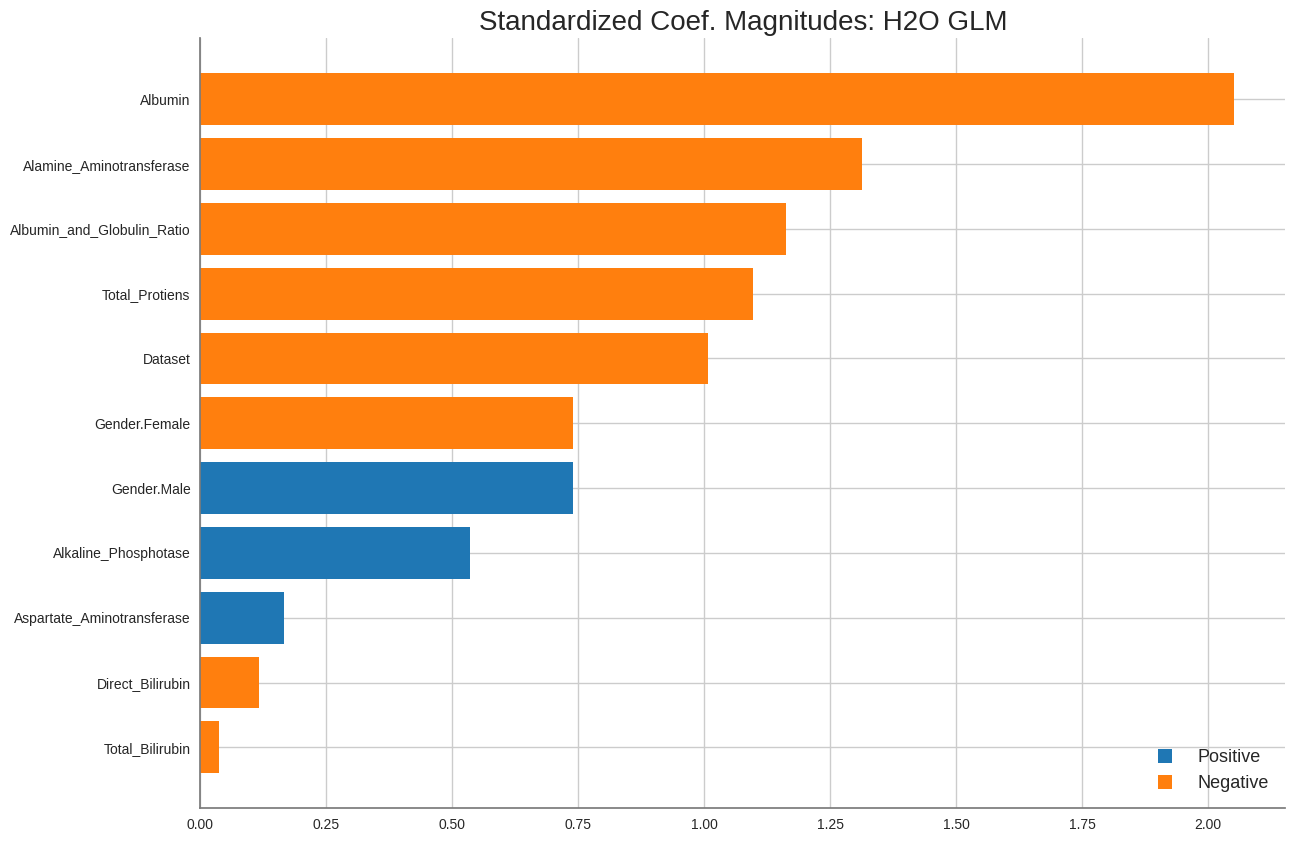

In [94]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

# SHAP Analysis on AutoML Model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse      mse      mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  -------  -------  -------  --------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_1_20230410_11352_model_20         15.6717  245.602  12.9693  0.420584                   245.602                 796                   0.012795  XGBoost
StackedEnsemble_AllModels_4_AutoML_1_20230410_11352     15.9368  253.983  13.1514  0.425391                   253.983                 153                   0.766154  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230410_11352_model_28         15.9562  254.6    13.1859  0.425299                   254.6                    43                   0.065455  XGBoost
StackedEnsemble_AllModels_3_AutoML_1_20230410_11352     15.9687  255.001  13.2177  0.427938                   255.001                 263                   0.344655  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230410_11352_model_16         16.0609  257.953  13.243   0.420159                   257.953                 813                   0.003896  XGBoost
StackedEnsemble_AllModels_6_AutoML_1_20230410_11352     16.0706  258.263  13.1676  0.424762                   258.263                1321                   0.433892  StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20230410_11352  16.1508  260.849  13.2528  0.428692                   260.849                 949                   0.296777  StackedEnsemble
GBM_5_AutoML_1_20230410_11352                           16.161   261.178  13.3075  0.422334                   261.178                 124                   0.006693  GBM
XGBoost_grid_1_AutoML_1_20230410_11352_model_49         16.1769  261.692  13.4509  0.430812                   261.692                  44                   0.006412  XGBoost
XGBoost_grid_1_AutoML_1_20230410_11352_model_47         16.1874  262.032  13.4515  0.43292                    262.032                  45                   0.005809  XGBoost
GBM_grid_1_AutoML_1_20230410_11352_model_7              16.1963  262.32   13.3729  0.435793                   262.32                   35                   0.006993  GBM
XGBoost_grid_1_AutoML_1_20230410_11352_model_15         16.2116  262.815  13.448   0.431763                   262.815                 435                   0.057257  XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_11352  16.2155  262.941  13.2925  0.434007                   262.941                 127                   0.06537   StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230410_11352     16.2692  264.687  13.3585  0.434739                   264.687                 130                   0.130828  StackedEnsemble
DeepLearning_grid_2_AutoML_1_20230410_11352_model_2     16.2993  265.668  13.3014  0.44213                    265.668                  72                   0.007857  DeepLearning
XGBoost_grid_1_AutoML_1_20230410_11352_model_24         16.3117  266.072  12.9852  0.430448                   266.072                1718                   0.011648  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_11352  16.3381  266.933  13.5489  0.439665                   266.933                 127                   0.024387  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230410_11352     16.3442  267.134  13.3687  0.431707                   267.134                 137                   0.288543  StackedEnsemble
XGBoost_grid_1_AutoML_1_20230410_11352_model_37         16.3532  267.426  13.5245  0.428078                   267.426                  48                   0.004844  XGBoost
GBM_grid_1_AutoML_1_20230410_11352_model_1              16.3566  267.539  13.3077  0.440352                   267.539                  59                   0.007027  GBM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

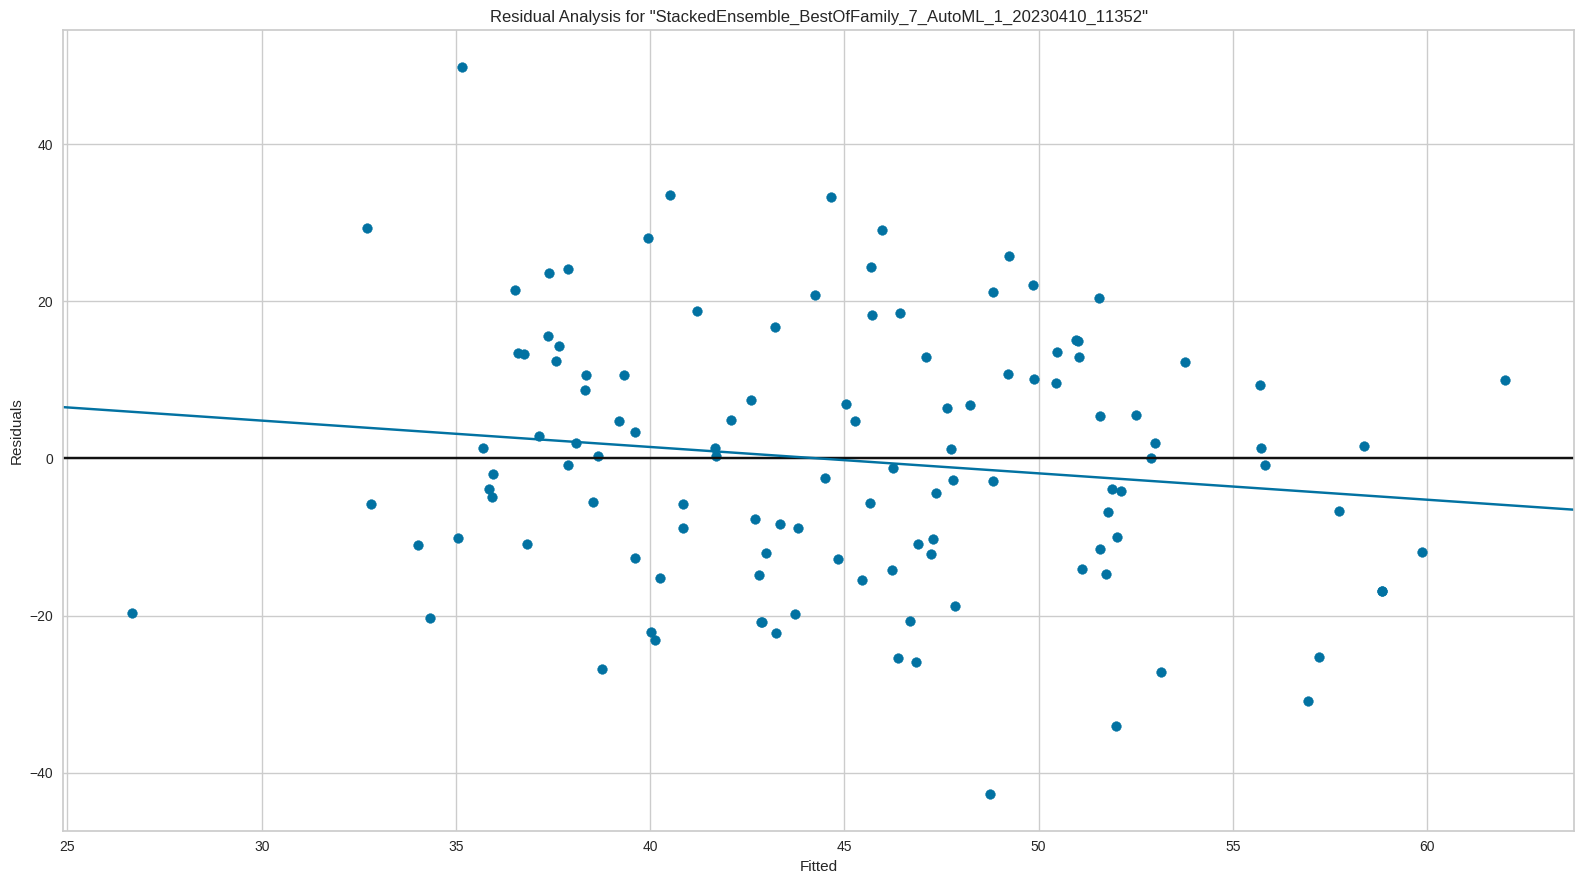

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

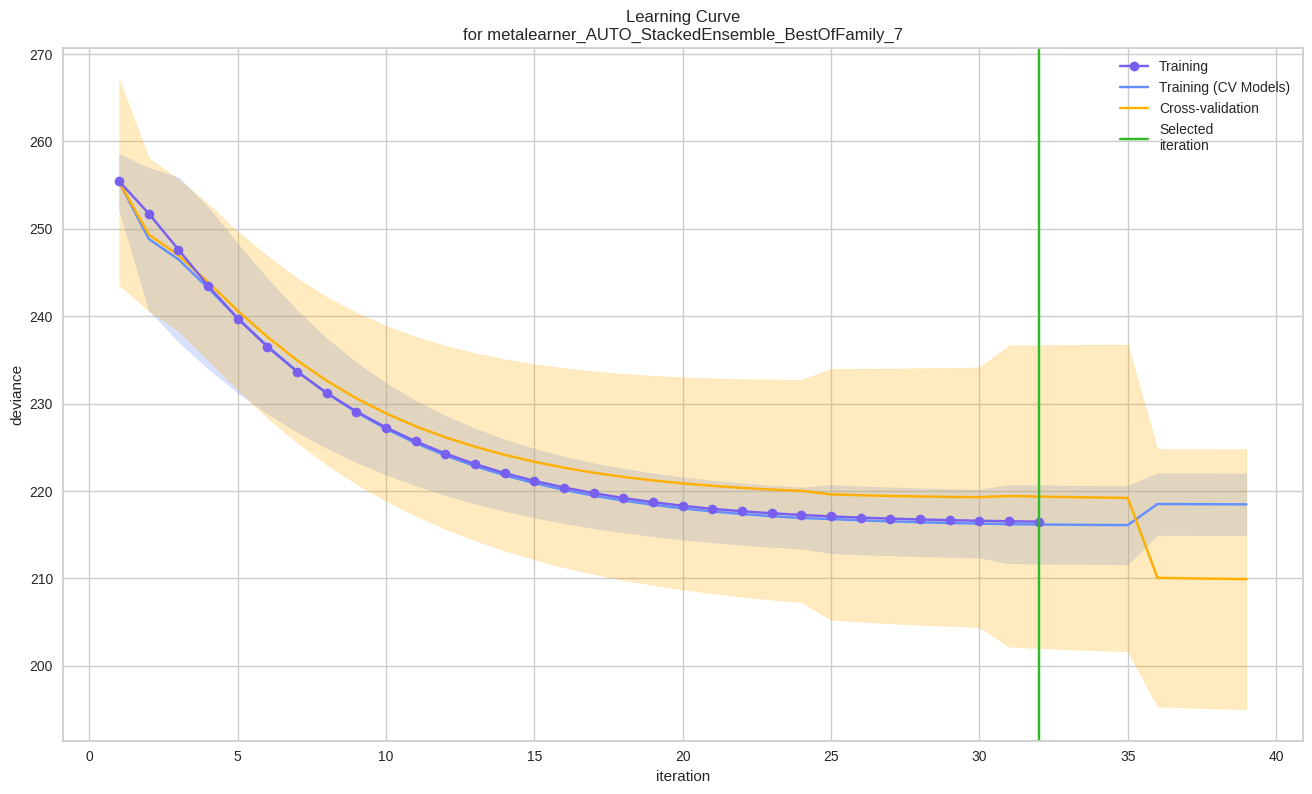

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

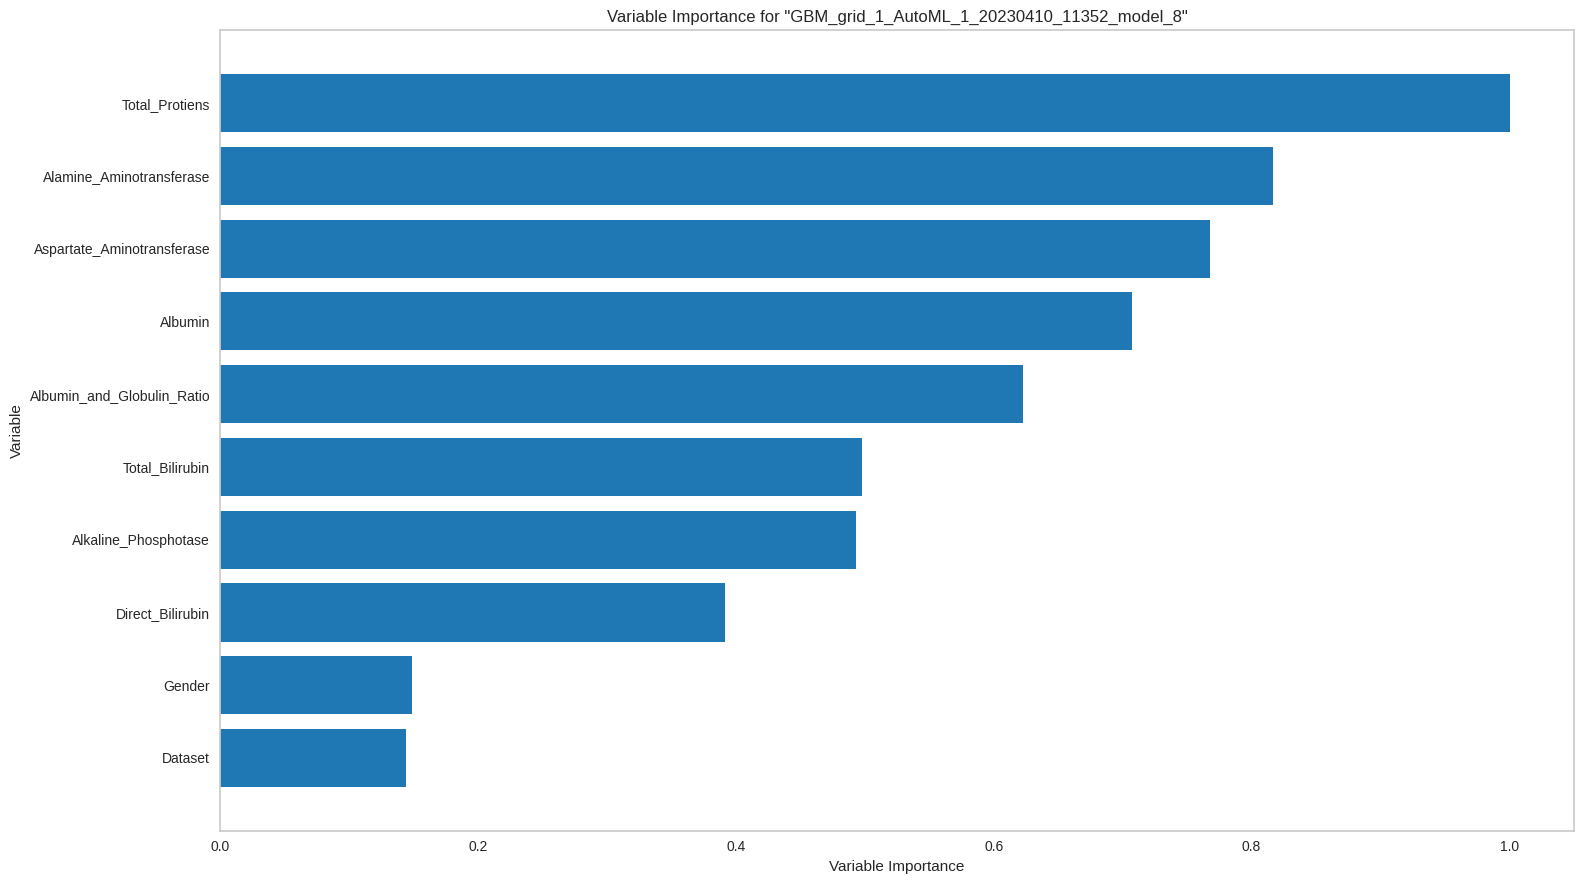

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

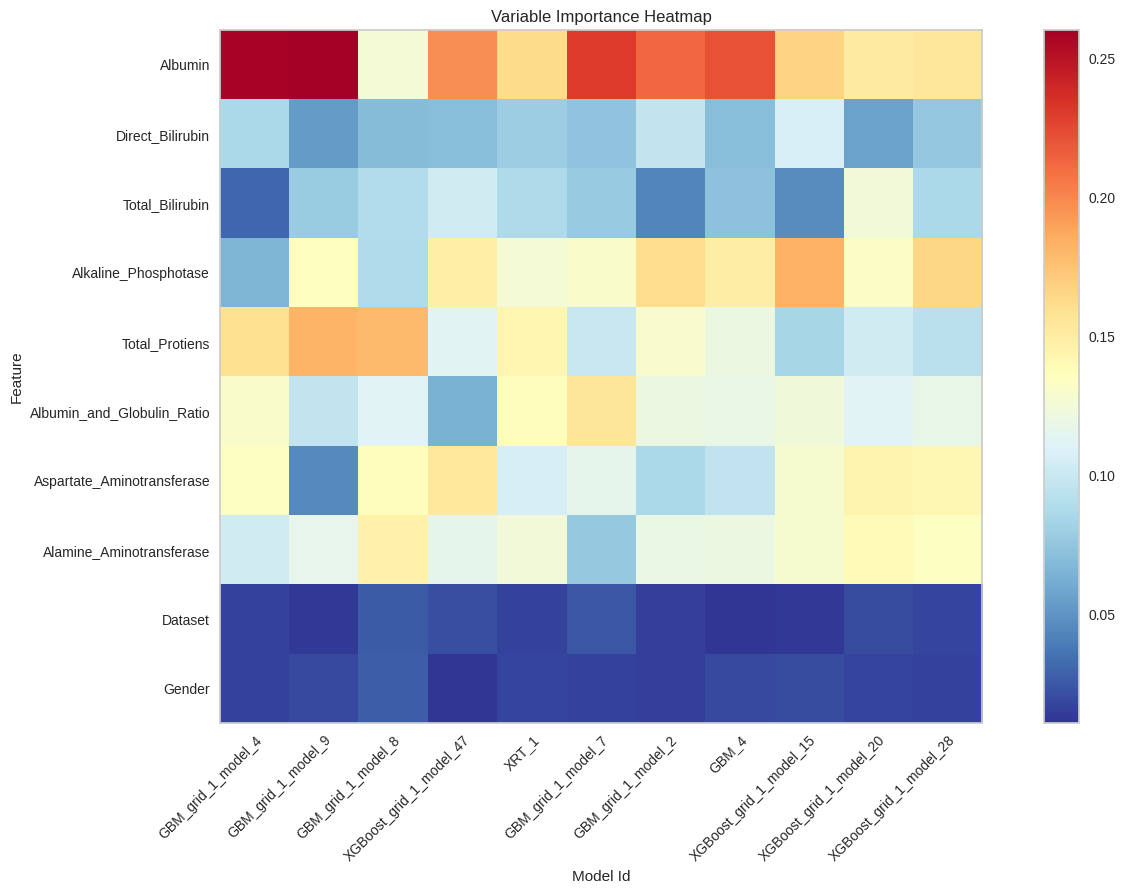

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

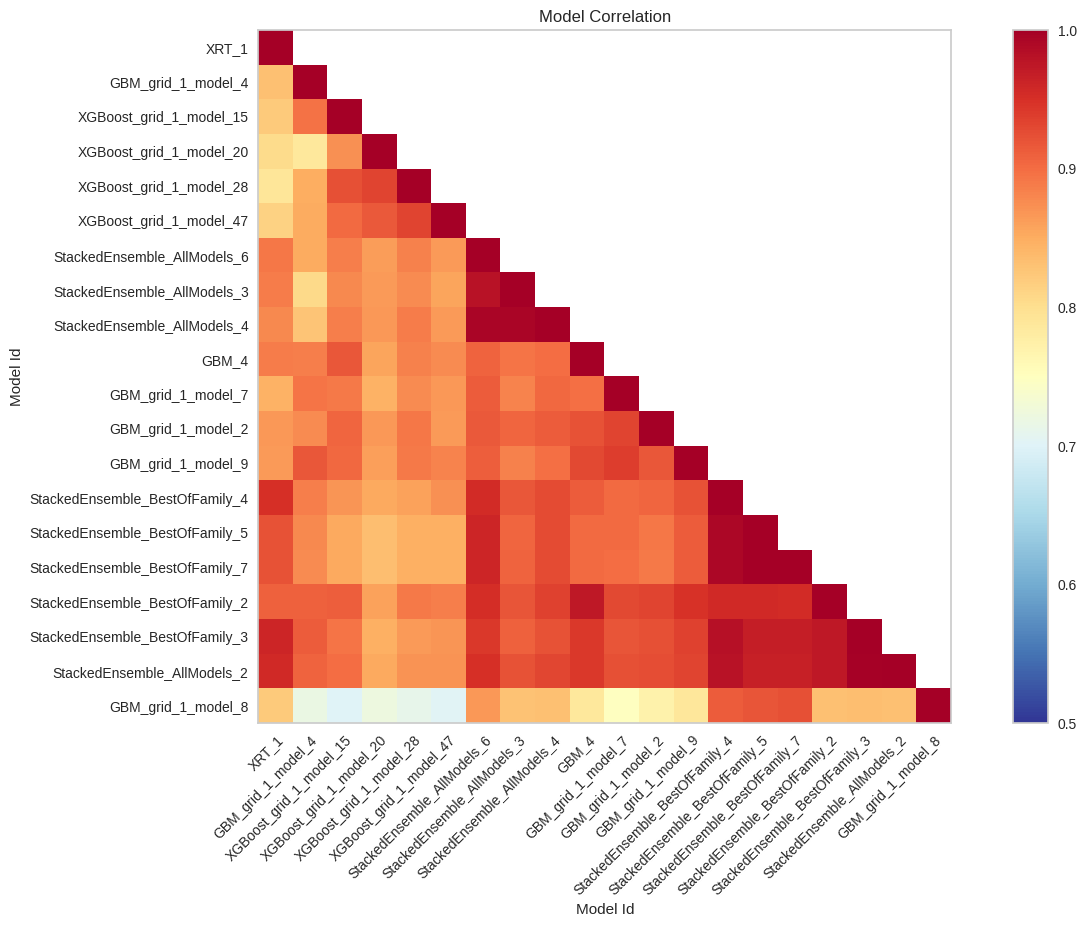

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

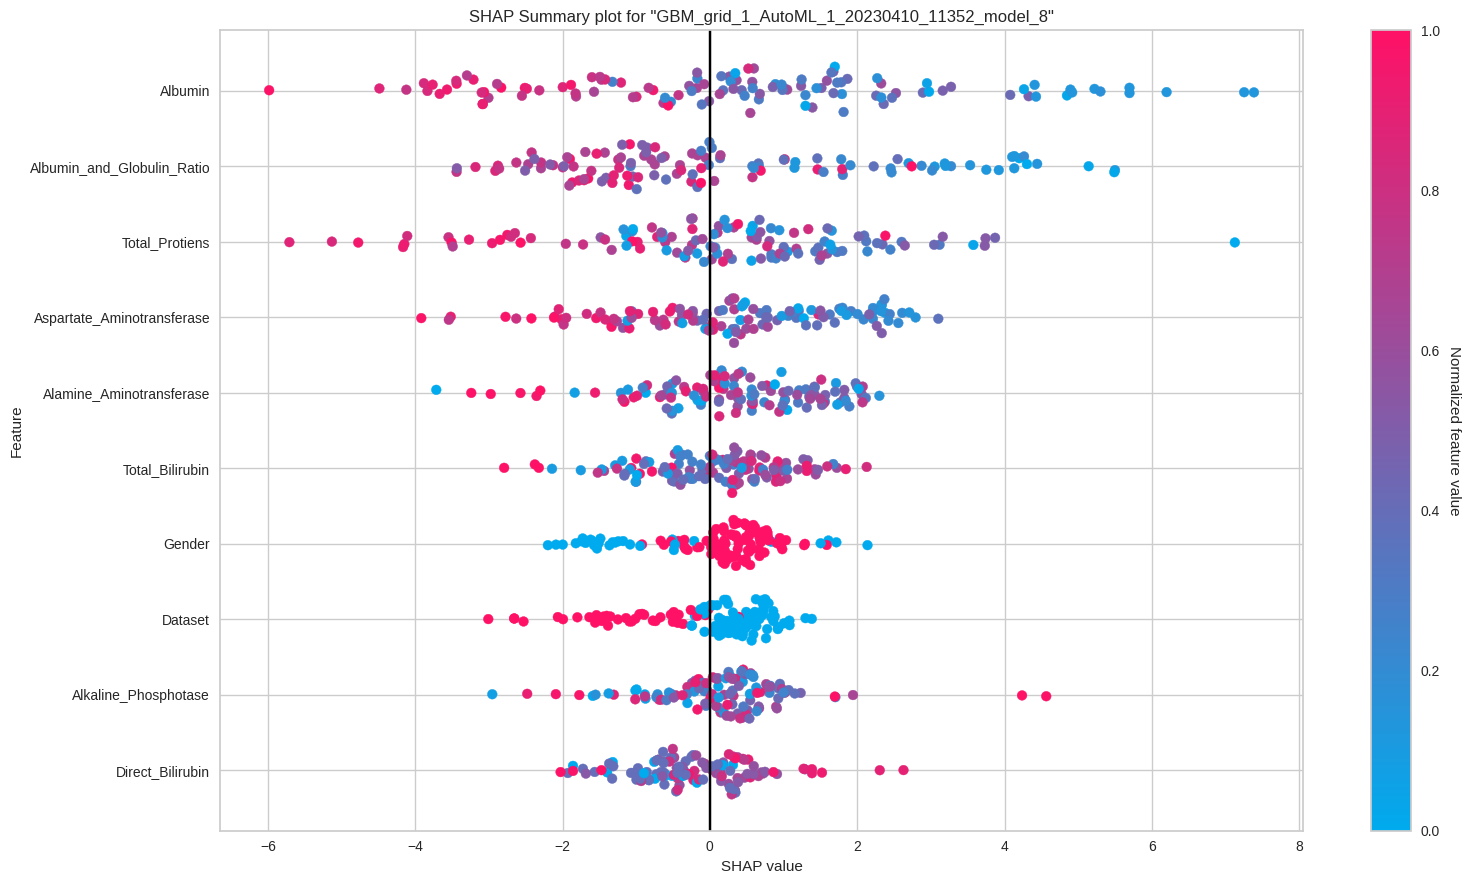

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

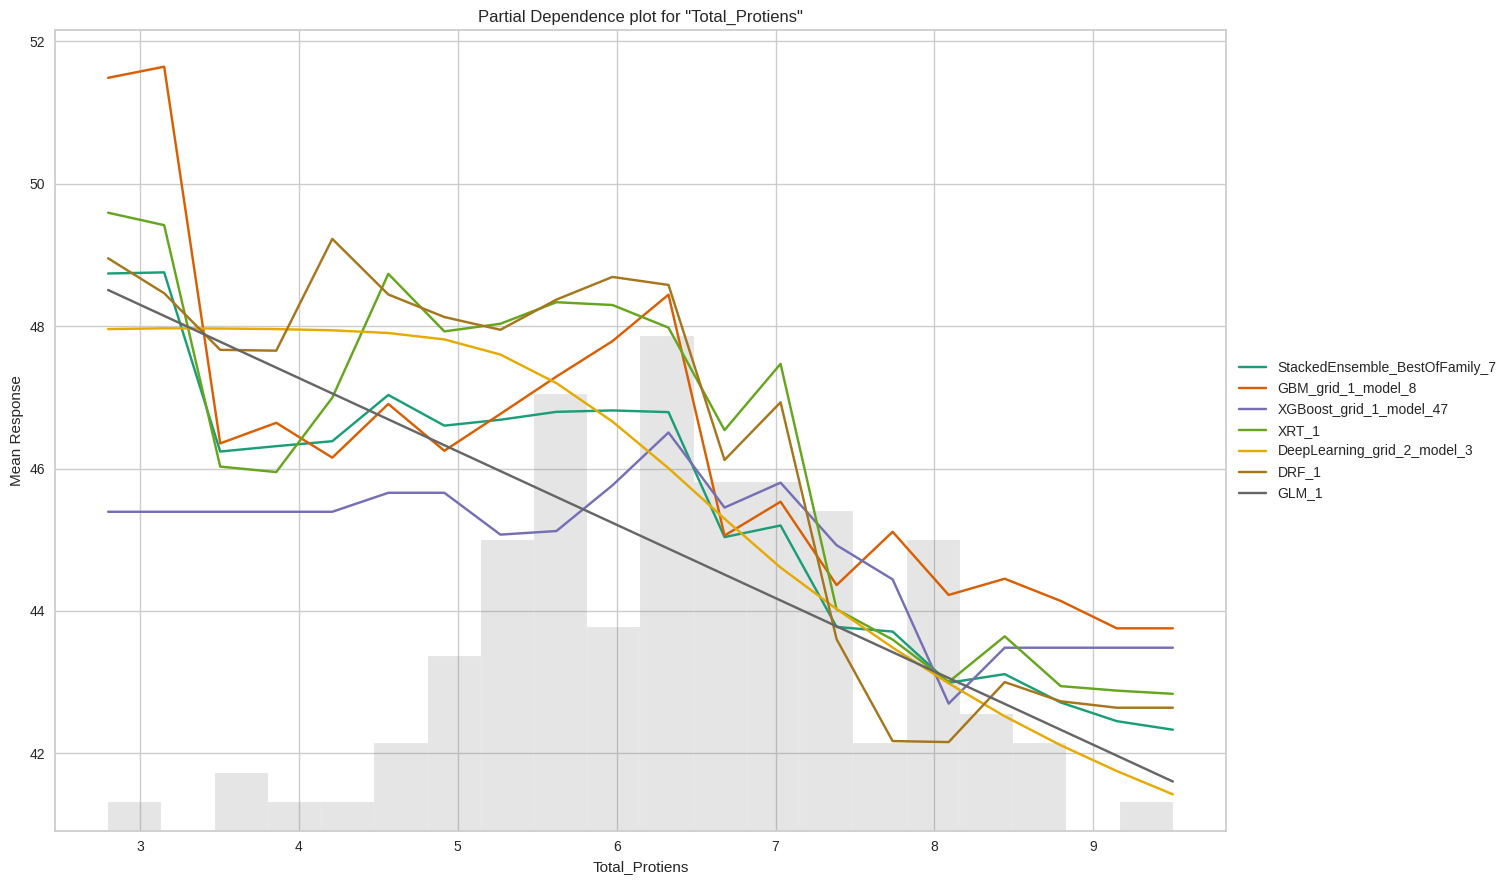

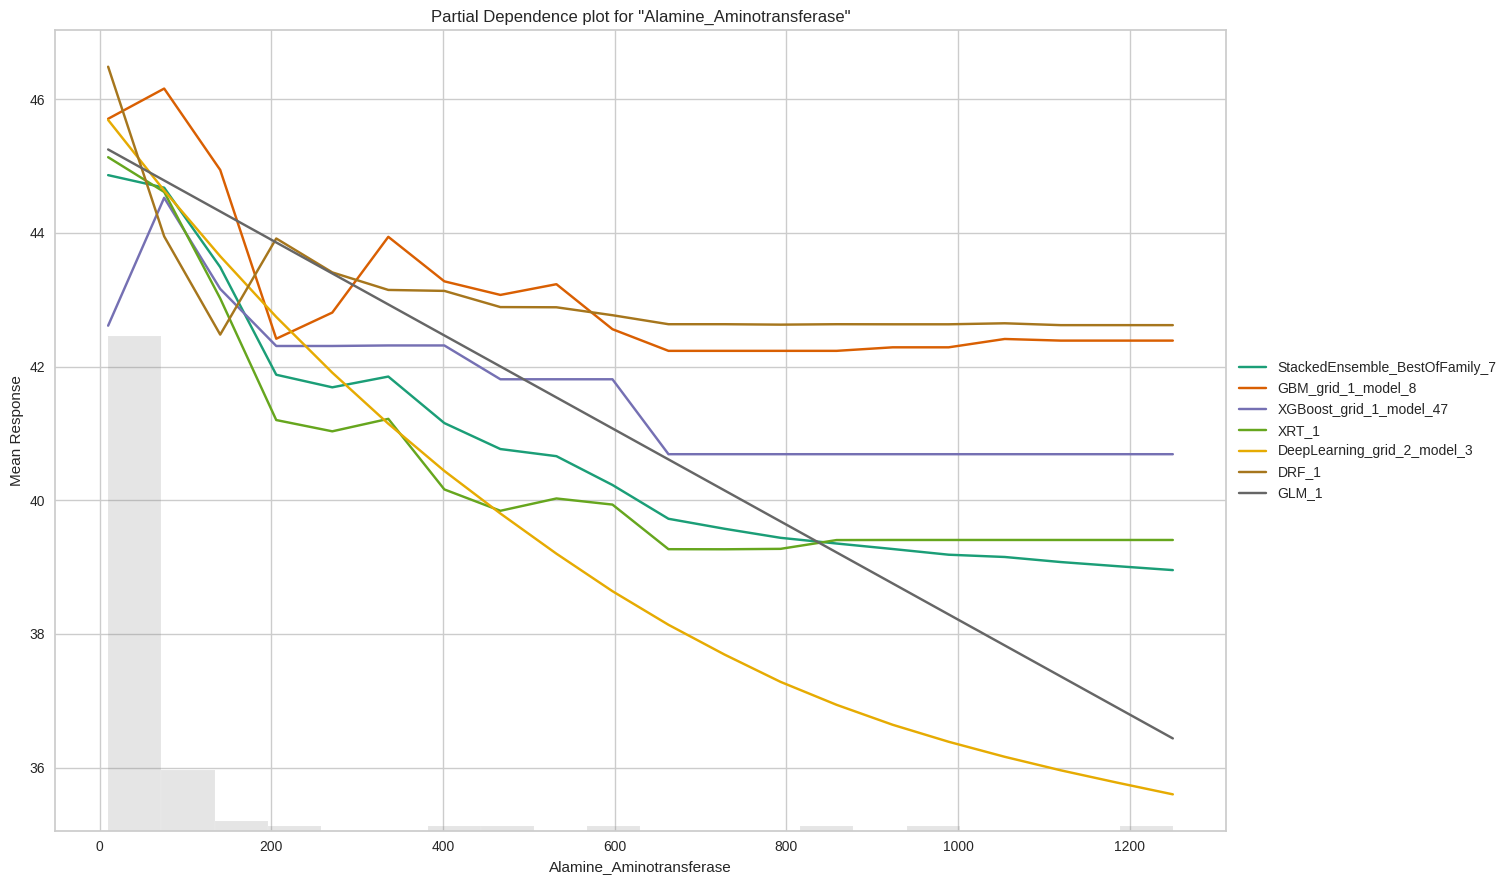

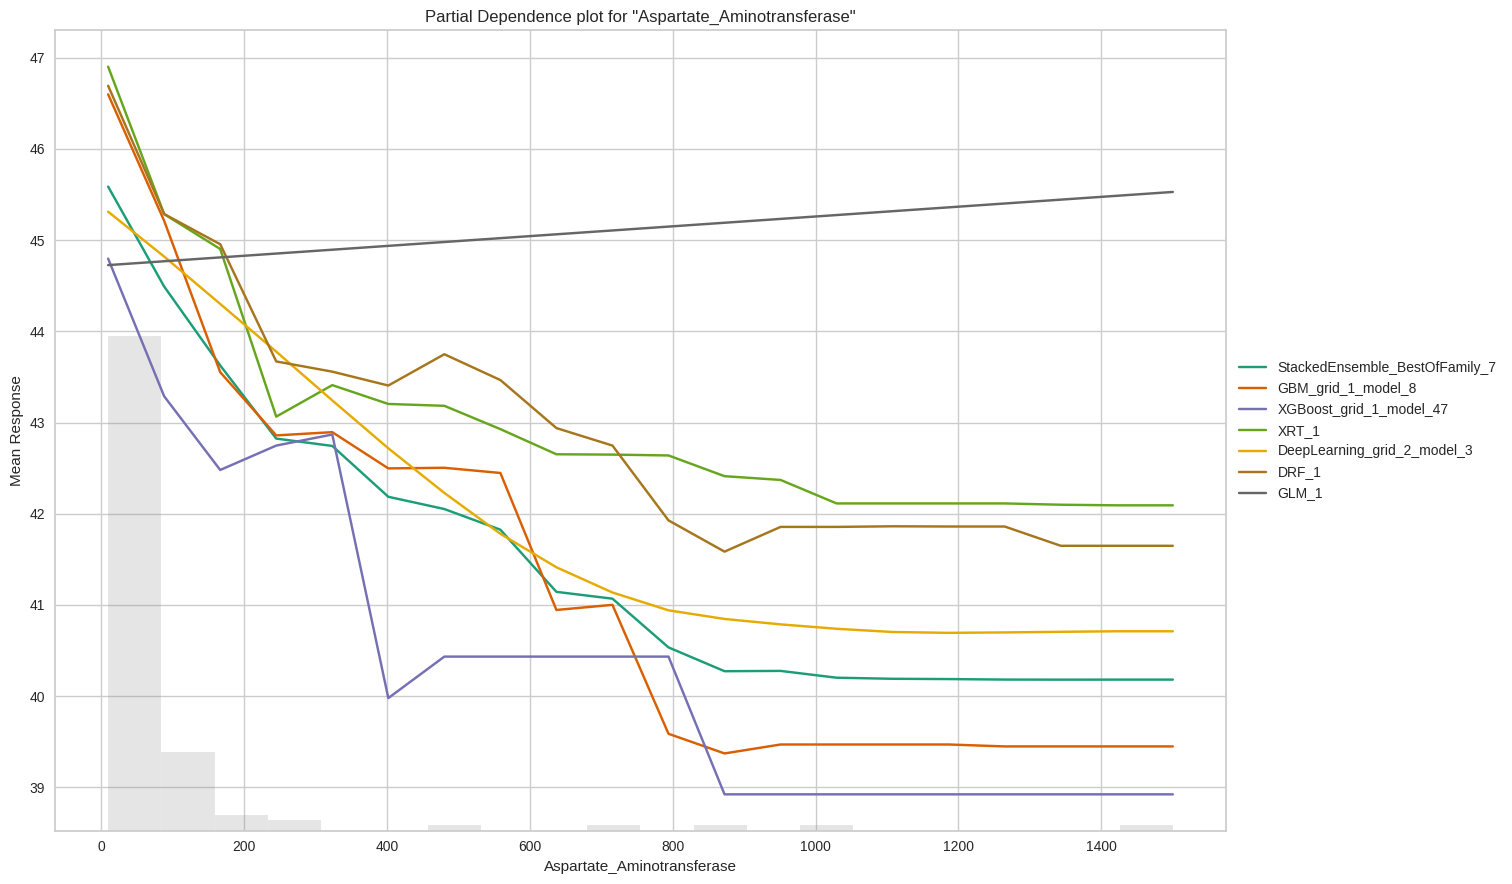

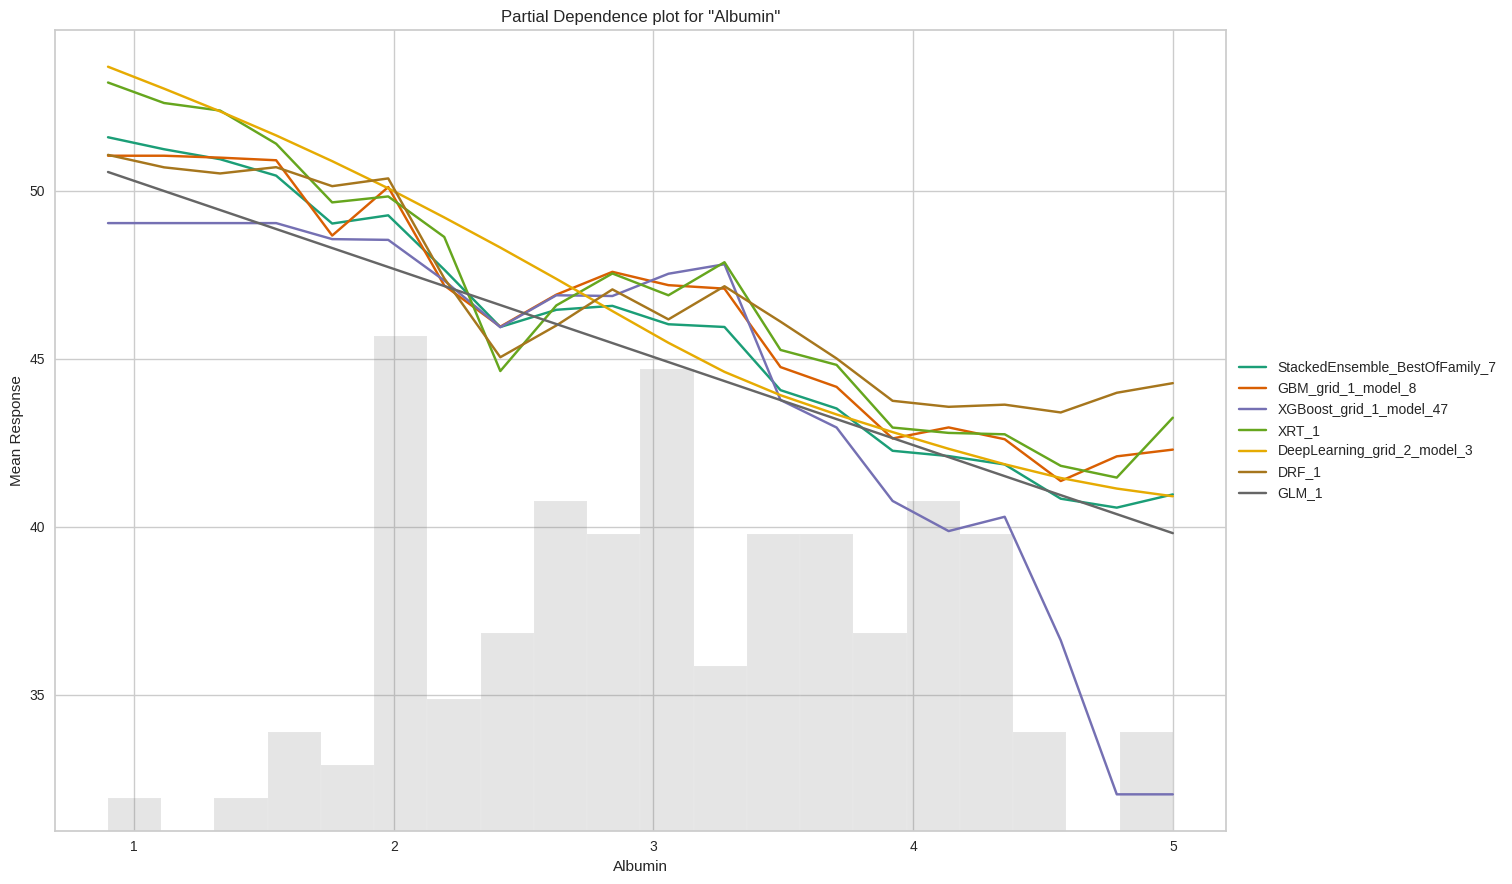

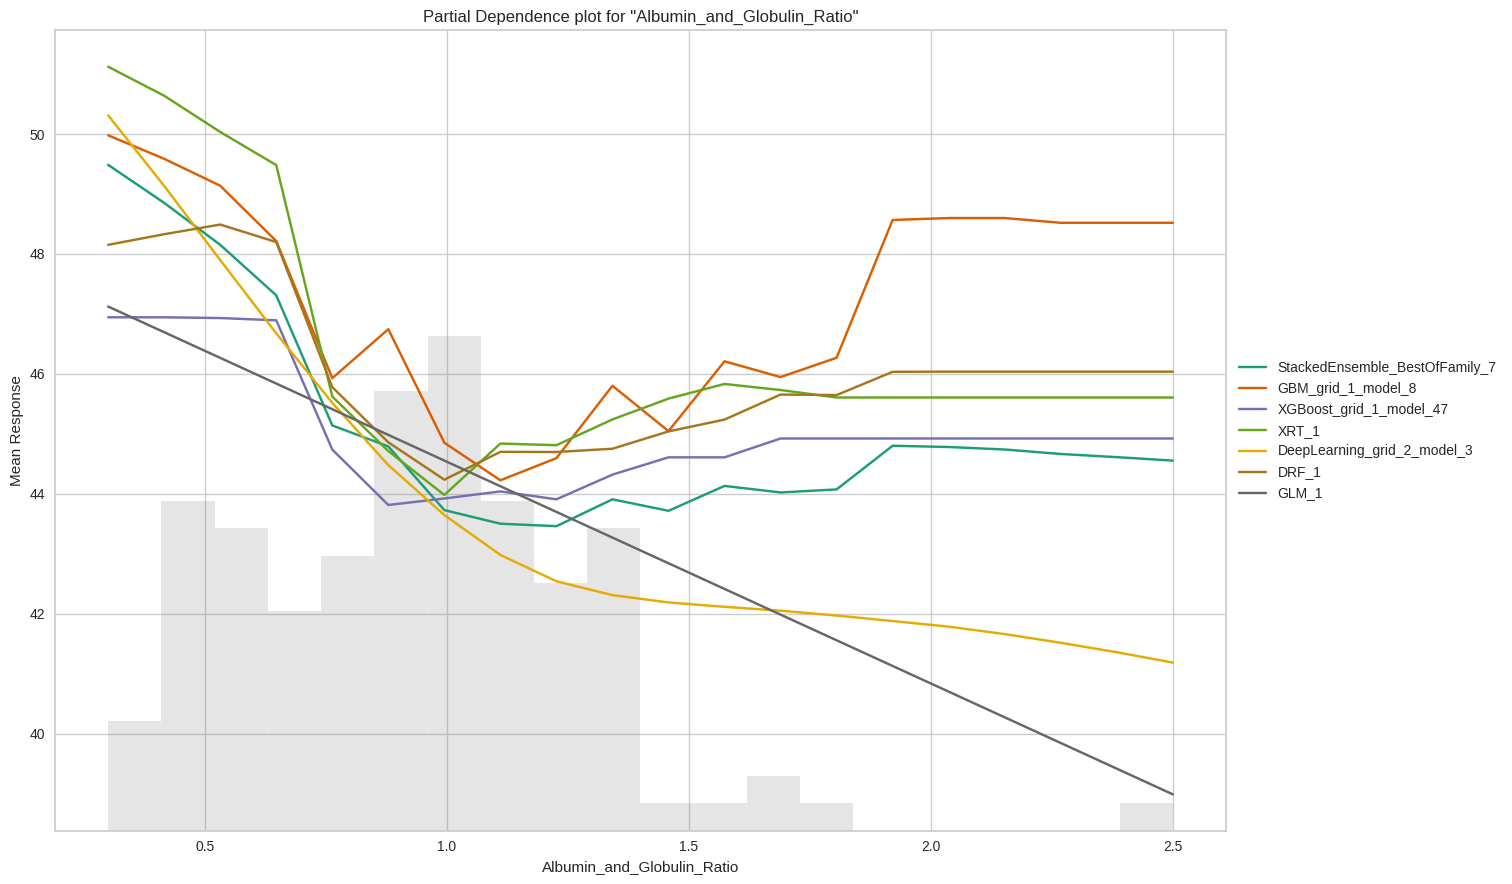

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

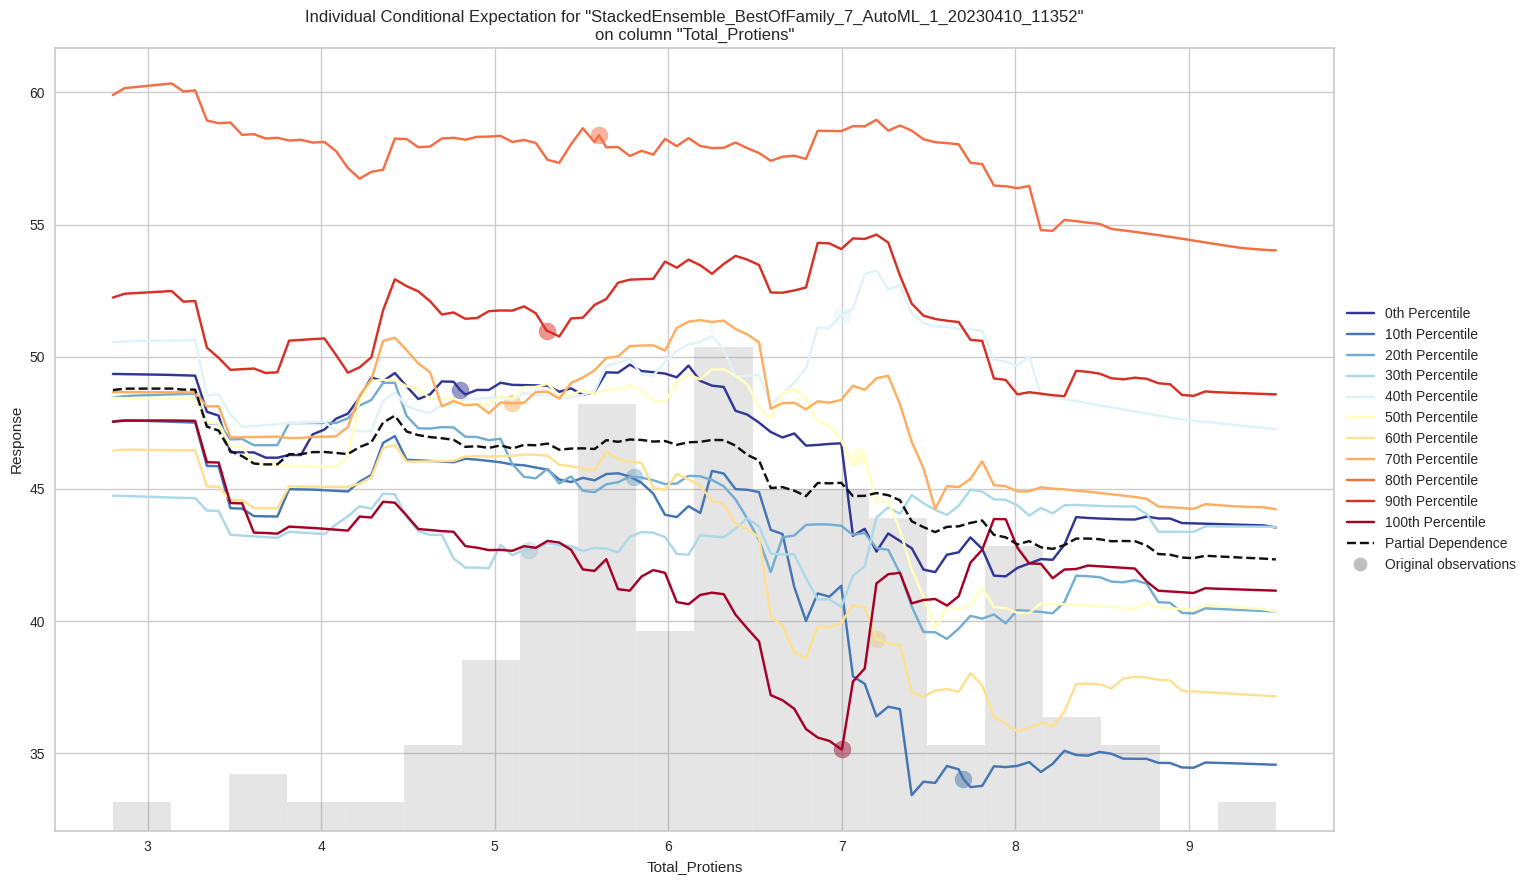

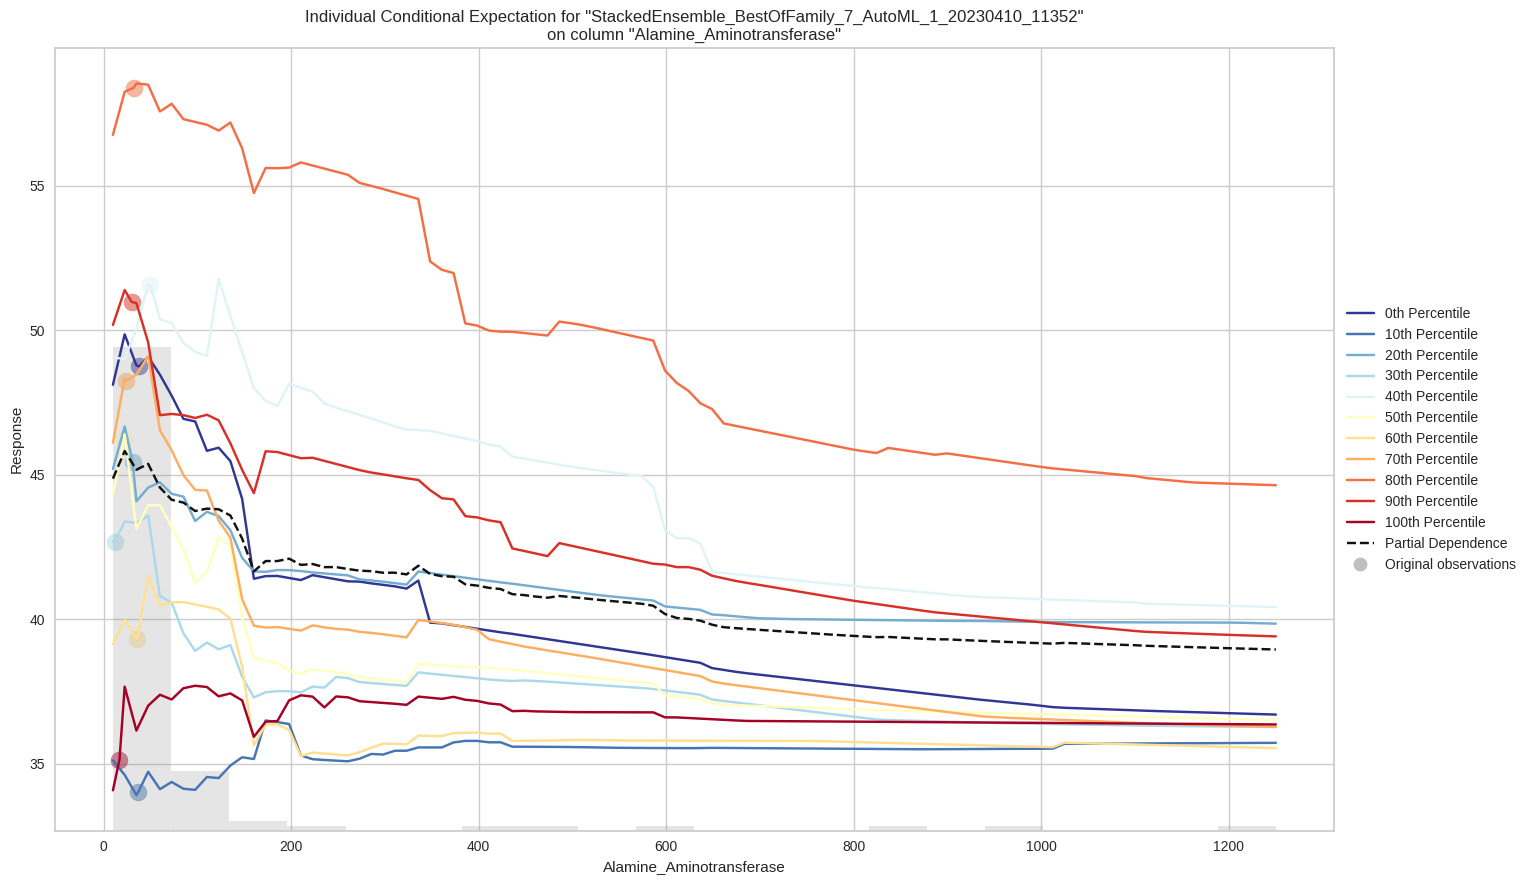

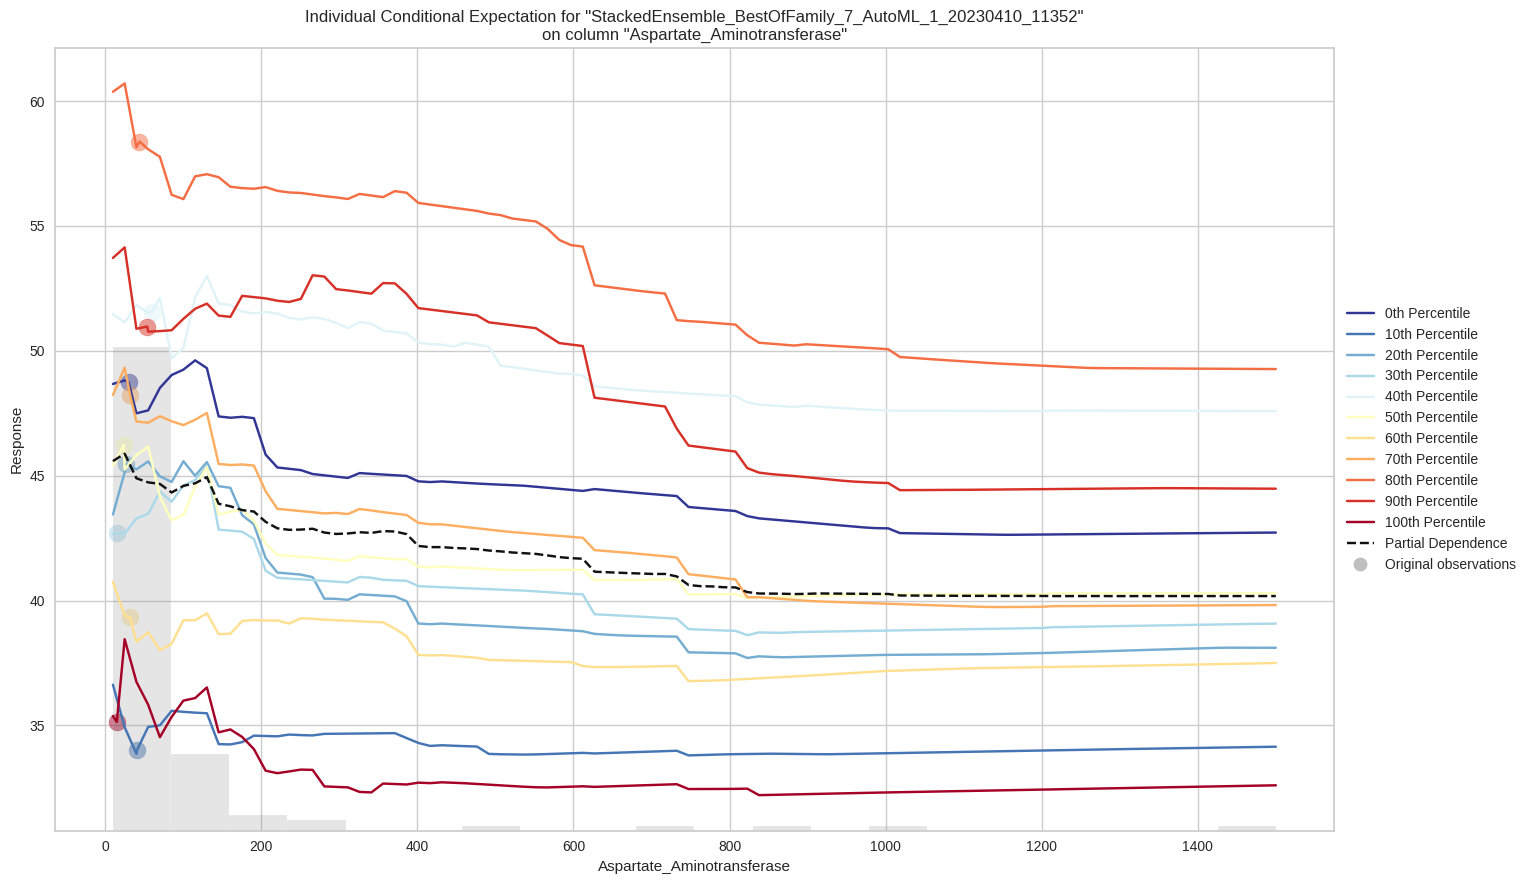

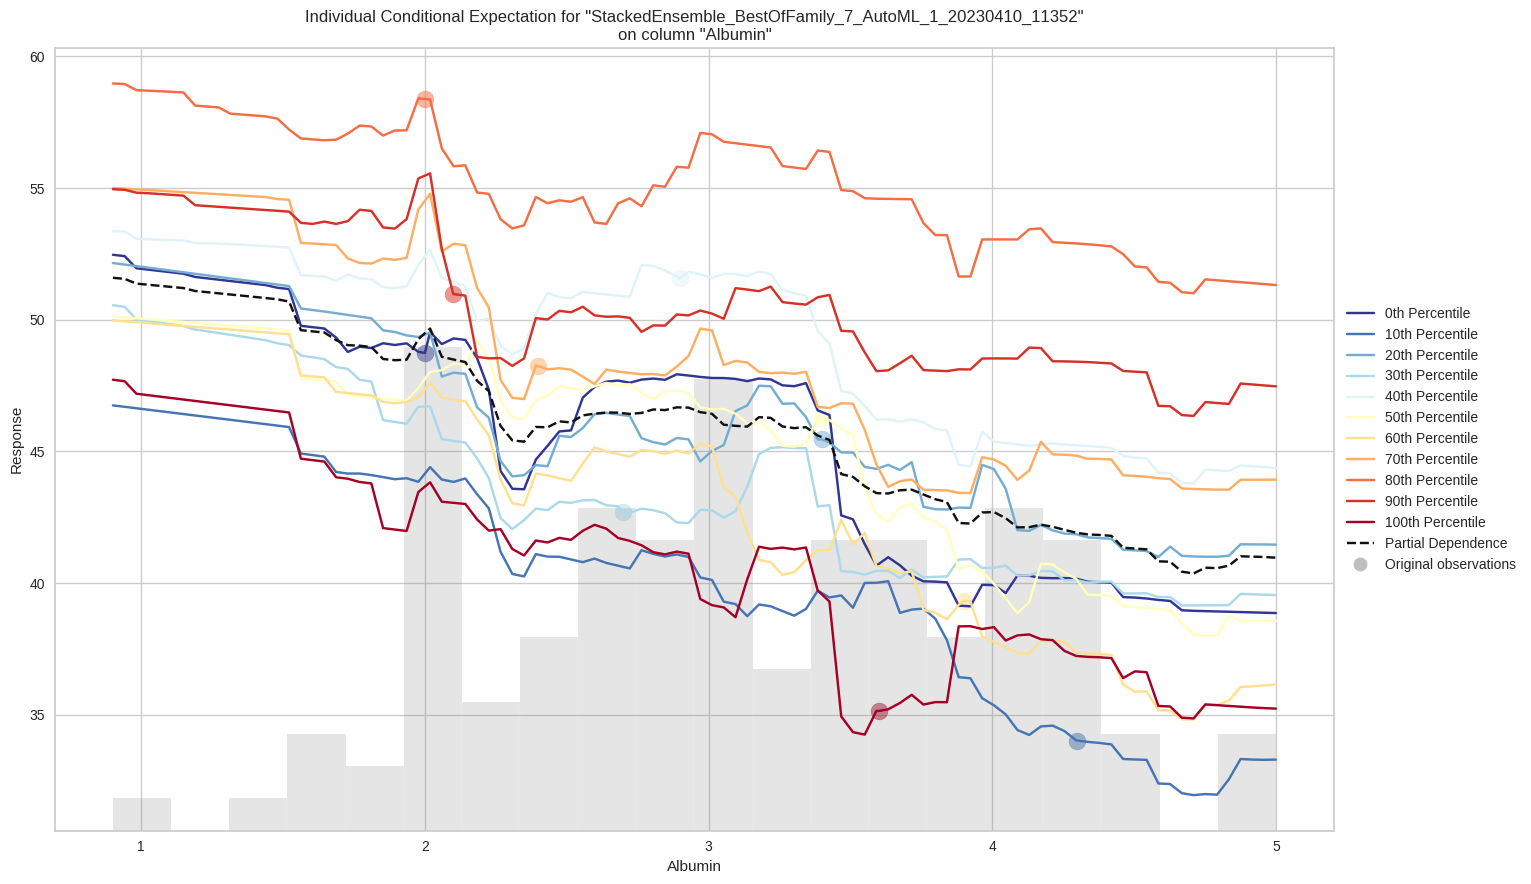

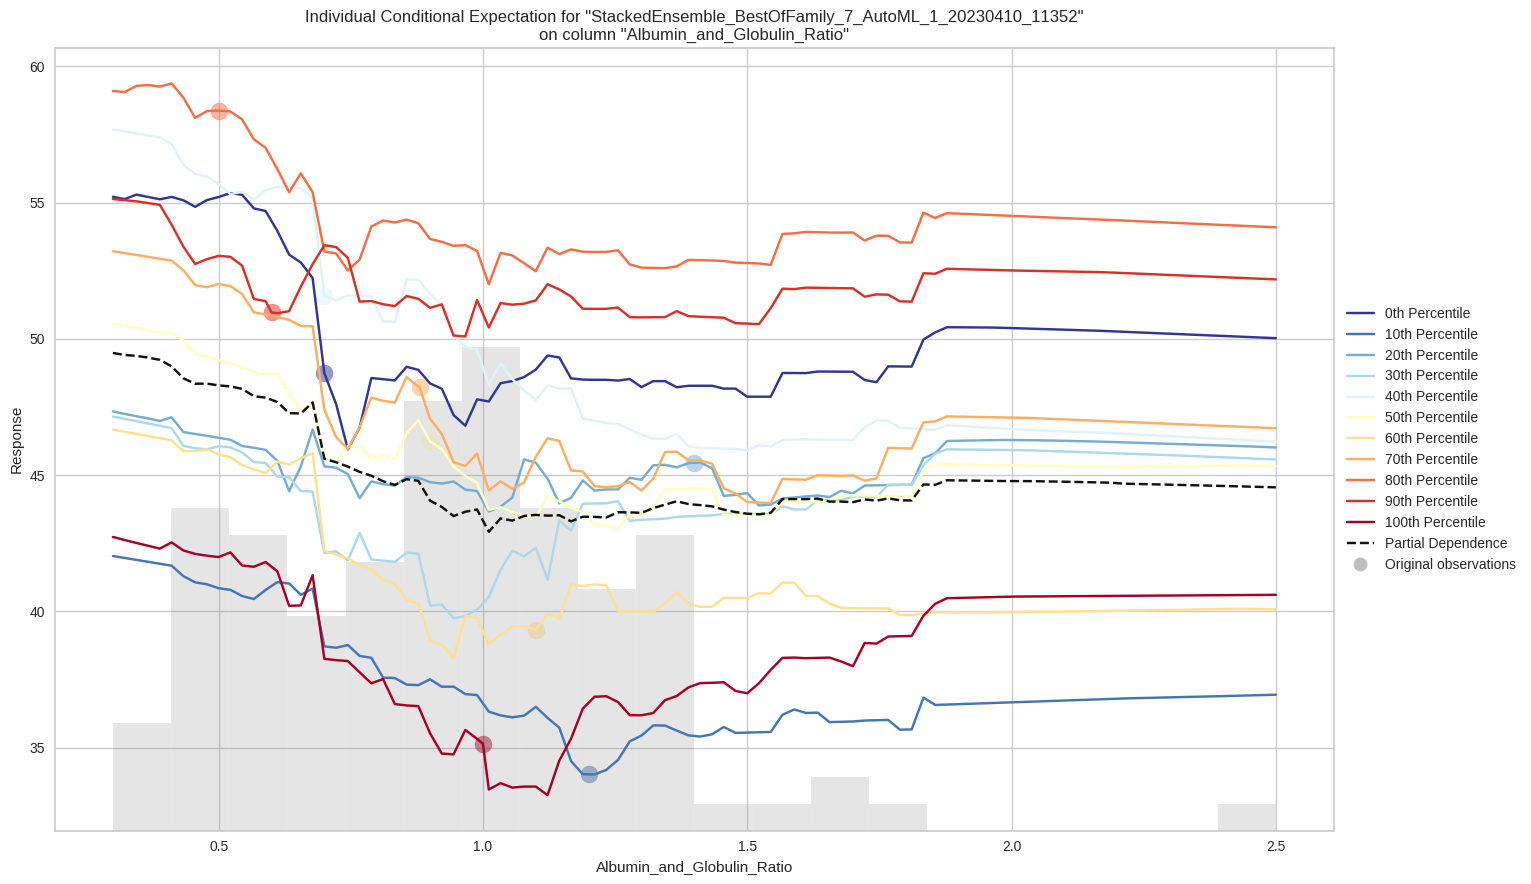

In [95]:
exa = aml.explain(df_test)

# Questions

# **What is the Question?**

Ans: The Indian Liver Patient dataset is a valuable resource for anyone interested in analyzing the factors that affect liver disease diagnosis. With data on 583 patient records and 11 features, including numerical and categorical variables, this dataset provides a comprehensive view of the liver disease diagnosis process. However, before it can be used for predictive modeling or research, it requires thorough data cleaning, preprocessing, and feature selection to address missing values and identify the most relevant variables. Despite these challenges, the Indian Liver Patient dataset remains a useful resource for predicting liver disease diagnosis and conducting research in the healthcare industry.

# **What did we do?**

Ans: Data Cleaning:
In this step, we would handle missing values, remove duplicates, and correct errors in the Indian Liver Patient dataset. Some techniques that could be used include:

Handling missing values: We could impute missing values using techniques such as mean imputation, median imputation, or k-nearest neighbor imputation.

Removing duplicates: We could remove any duplicate rows or columns in the dataset.

Correcting errors: We could identify and correct any errors in the dataset by manually checking the data or using outlier detection techniques.

Feature Selection:
Correlation matrix, box plot, and QQ plot are useful tools for feature selection in the Indian Liver Patient dataset. A correlation matrix can help identify features with a strong correlation to the target variable, while box plots can identify outliers and unusual values. QQ plots can help identify features that deviate from a normal distribution. Overall, using these tools can help identify the most important features, remove unsuitable features, and ensure features are normally distributed.

Model Interpretability:
In this step, we would ensure that our model is interpretable, meaning that we can understand how it arrived at its predictions. The techniques that could be used include:

SHAP: We could use SHapley Additive exPlanations (SHAP) to explain the output of any machine learning model.

Feature importance: We could identify the most important features that contribute to the predictions using techniques such as permutation feature importance or SHAP feature importance.

# **How well did it work?**

The techniques used in this assignment were highly effective in preparing the data for modeling and identifying important variables for predicting liver disease in Indian patients. The data cleaning and preprocessing steps were essential to ensure that the data was of high quality, and missing values were handled appropriately using imputation methods. The outlier detection and removal techniques were also highly effective in identifying and addressing data anomalies, which resulted in a more accurate and reliable model.

The feature selection techniques used in this assignment were also highly effective in identifying the most important variables for predicting liver disease. By using correlation analysis, OLS, and VIF, we were able to identify variables that had a significant impact on liver disease and exclude irrelevant variables from the model. This resulted in a streamlined and more efficient model, which was better suited to making accurate predictions.

Overall, the techniques used in this assignment demonstrated the importance of data cleaning and feature selection in predictive modeling. By using these techniques, we were able to extract valuable insights from the Indian Liver Patient dataset and build a model that accurately predicted liver disease. The success of the resulting model highlights the importance of these techniques in improving the accuracy and reliability of predictive models.

# **What did we learn?**

Ans: The importance of data analysis and preprocessing cannot be overstated in machine learning. Before building a model, it is crucial to ensure that the data is complete, correct, and consistent. This may involve identifying and handling missing values, checking for outliers, and removing irrelevant or redundant features.

However, it is also essential to avoid overfitting by evaluating the model's performance on a separate testing set. This requires selecting appropriate evaluation metrics and tuning hyperparameters to optimize the model's performance.

Overall, careful data analysis and preprocessing, combined with appropriate evaluation and tuning, are essential for developing accurate and reliable machine learning models.

# Conclusion

For this dataset the best model according to AutoML is drf. When a classifier like Random Forest was implemented on this dataset it gave a better accuracy. The accuracy on testing data was 88.09 percent. On the other hand when Linear Regression was implemented the accuracy for training data was 79.8 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

For each model, the important feature obtained were different. Among all these 3 models the best accuracy was obtained for random forest model.The important features for this model were Albumin, Gender and Alkaline_Phosphotase. This means that for this model the target variable 'Age' is highly depended on Albumin, Gender and Alkaline_Phosphotase.



# License

**MIT License**

Copyright (c) 2023 Nupoor Korde

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

* Owner - AI Skunkworks
* Link - https://github.com/aiskunks/Skunks_Skool
<br></br>
* Author name - Prof Nik Bear Brown
* Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

* Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization
* Link - https://seaborn.pydata.org

4.The methods and parameters of the GLM model have been adapted from the h2o documentation</br>
* Author - **H2O.ai**
* Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html</br>

# References

OLS Model- http://net-informations.com/ds/mla/ols.html 

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/ 

Kaggle Notebook- https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression 

Dataset- https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Random Forest Model- https://towardsdatascience.com/understanding-random-forest-58381e0602d2 and https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

SHAP Analysis- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d and https://www.kaggle.com/code/dansbecker/shap-values/tutorial

Reference Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb